<a href="https://colab.research.google.com/github/hawkilol/pattern-matching-algos/blob/main/Pattern_Matching01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Lembretes
---

*   Cinco textos com tamanhos diferentes:
|T| = 500, |T| = 1000, |T| = 1500, |T| = 2000 e |T| = 5000.
*   Usar gerador de “Lero lero” ou “Lorem Ipsum” para obter os textos com os
tamanhos requisitados, e escolher um termo padrão no texto.

1.   https://lerolero.bgnweb.com.br/
2.   https://www.invertexto.com/gerador-de-lorem-ipsum
3.  https://br.lipsum.com/

*   Cada algoritmo deve ser executado, pelo menos, 10 vezes em cada texto diferente e o tempo computacional deve ser armazenado em cada execução. 
* O comportamento médio de cada algoritmo deve ser analisado (Melhor, Médio e Pior Caso/Complexidade Assintótica nesses casos).







In [ ]:
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import io


# Força Bruta
---
No casamento de cadeias, o algoritmo Força Bruta compara caractere a caractere do termo em que está tentando ser encontrado na palavra em questão, até que todas as ocorrências do termo na palavra sejam encontradas. Na comparação de caracteres, caso exista um caractere que não coincide, a comparação cessa por um momento, e a comparação começa novamente do primeiro caractere do termo com o caractere seguinte da palavra, caso ainda exista e não exceda o tamanho do termo (caso o tamanho do número de caracteres do termo seja maior que o número de caracteres possíveis de ser fazer o casamento a partir de certo índice).

The worst-case running time of this algorithm as O(nm).

In [ ]:
# %%writefile bf.h
# #ifndef FOO_DOT_H
# #define FOO_DOT_H

# void bf(char* txt, char* pattern);
 
# #endif

Overwriting bf.h


In [ ]:
%%writefile bf.c
#include <stdio.h>
#include <string.h>

void bf(char* txt, int txtLen, char* pattern, int patternLen){
    //int M = strlen(pattern);
    int M = patternLen;
    //int N  = strlen(txt);
    int N = txtLen;
    int j = 0;
    for(int i = 0; i <= N - M; i++){
        for(j = 0; j < M; j++){
            if(txt[i + j] != pattern[j]){
                break;
            }
        }
        if(j == M){ // if pattern[0...M-1] = txt[i, i+1, ...i+M-1]
            printf("Pattern found starting at i = %d and ending at j = %d\n", i, i+j-1);

        }
    }
}

int main()
{
    char txt[] = "JAVAJAVAJAVJAVAJAVACJAVA";
    //char txt2[] = "According to the voices of my head, Java sucks and shouldn't be used except if Client has the requirement to do so, (warning) garbage collector can delete the Client upon execution";
    
    char pattern[] = "JAVA";
    //char pattern2[] = "Java sucks";
    
    int textsize = sizeof(txt)/sizeof(txt[0]);
    int patternsize = sizeof(pattern)/sizeof(pattern[0]); 

    bf(txt, textsize, pattern, patternsize);
    return 0;
}

Overwriting bf.c


In [ ]:
%%shell
ls
gcc bf.c -o bf
./bf

bf    bf.h  bmh.c  bmh.o  bmhs.c    runTests.c	sample_data  Time.csv
bf.c  bf.o  bmh.h  bmhs   runTests  runTests.o	shiftEx.c    TimeTests.csv
Pattern found starting at i = 0 and ending at j = 3
Pattern found starting at i = 4 and ending at j = 7
Pattern found starting at i = 11 and ending at j = 14
Pattern found starting at i = 15 and ending at j = 18
Pattern found starting at i = 20 and ending at j = 23


# Boyer-Moore-Horspool (Boyer-Moore-Horspool)
---
No casamento de cadeias, o algoritmo Boyer-Moore-Horspool (BMH) é um algoritmo que funciona mediante três mecanismos principais: comparação do último carautiliza uma tabela de deslocamento, que estima quantos caracteres devem ser pulados caso o casamento falhe.


In [ ]:
# %%writefile bmh.h
# #ifndef FOO_DOT_H
# #define FOO_DOT_H

# void bmh(char* txt, char* pattern);
# #endif

Writing bmh.h


In [ ]:
%%writefile bmh.c
/* BMH*/
//#include "bmh.h"

#include <string.h>
#include <stdio.h>

#include <limits.h>

# define N_CHARS 256


int max (int a, int b) {
  if(a > b){return a;}
  else{return b;}
}

void badCharHeuristic( char *str, int size,
						int badchar[N_CHARS])
{
	int i;

	for (i = 0; i < N_CHARS; i++)
		badchar[i] = -1;

	for (i = 0; i < size; i++)
		badchar[(int) str[i]] = i;
}

void bmh(char* txt, int txtLen, char* pattern, int patternLen)
{
	int m = strlen(pattern);
	int n = strlen(txt);

	int badchar[N_CHARS];

	badCharHeuristic(pattern, m, badchar);

	int s = 0; 
				
	while(s <= (n - m)){
		int j = m-1;

		while(j >= 0 && pattern[j] == txt[s+j])
			j--;

		if (j < 0){
			printf("\n pattern found at shift i = %d", s);

			if(s+m < n){
				s += m-badchar[txt[s+m]];
			}
			else{
				s++;
			}
		}

		else
			s += max(1, j - badchar[txt[s+j]]);
	}
}



Overwriting bmh.c


In [ ]:
# %%shell
# ls
# gcc bmh.c -o bmh
# ./bmh

bf    bf.h  bmh.c  bmh.h  runTests    runTests.o
bf.c  bf.o  BMH.c  bmh.o  runTests.c  sample_data

 pattern found at shift i = 0
 pattern found at shift i = 4
 pattern found at shift i = 11
 pattern found at shift i = 15
 pattern found at shift i = 20

# Boyer-Moore-Horspool-Sunday (BMHS)
---




In [ ]:
#BMHS
def bmhs( text,  textLength,  pattern,  patternLength):
  maxChar = 256
  displacement = []
  # Assign default value to all letters
  for i in range(maxChar):
    displacement.append(patternLength + 1)

  # Pattern letters shift value
  # Since the index starts at 0, it is not necessary to add 1
  for letterIndex in range(patternLength):
      displacement[ord(pattern[letterIndex])] = patternLength - letterIndex
    
  # Adjust index to avoid out of bound error  
  i = patternLength - 1

  while (i < textLength):
      textLetterIndex = i
      patternLetterIndex = patternLength - 1

      # Compare from right to left
      while ((patternLetterIndex >= 0) and (text[textLetterIndex] == pattern[patternLetterIndex])):
        patternLetterIndex -= 1
        textLetterIndex -= 1
      
      
      # Match found in all pattern letters 
      if (patternLetterIndex < 0) :
        print (f'Match from position {textLetterIndex + 1} to position {textLetterIndex + patternLength}')
      

      # Shift the text pattern 
      i = i + displacement[ord(text[textLetterIndex + 1])]
  

text = "hbadecaedcade";
txt = "JAVAJAVAJAVJAVAJAVACJAVA";
patternk = "JAVA";
pattern = "cade";
bmhs(txt, len(txt), patternk, len(patternk));

Match from position 0 to position 3
Match from position 4 to position 7
Match from position 11 to position 14
Match from position 15 to position 18
Match from position 20 to position 23


In [ ]:
# BMHS - C
%%writefile bmhs.c
#include <stdio.h>
#include <string.h>
#include <time.h>

void bmhs(char* text, int textLength, char* pattern, int patternLength) {
  int maxChar = 256;
  int displacement[maxChar];
  // Assign default value to all letters
  for (int j = 0 ; j < maxChar; j++) {
    displacement[j] = patternLength + 1;
  }
  // Pattern letters shift value
  // Since the index starts at 0, it is not necessary to add 1
  for (int letterIndex = 0; letterIndex < patternLength; letterIndex++) {
    displacement[pattern[letterIndex]] =  patternLength - letterIndex;
  }

  // Adjust index to avoid out of bound error
  int i = patternLength - 1;
  
  while (i < textLength) {
    int textLetterIndex = i; 
    int patternLetterIndex = patternLength - 1;

    // Compare from right to left
    while ((patternLetterIndex >= 0) && (text[textLetterIndex] == pattern[patternLetterIndex])) { 
      patternLetterIndex--;
      textLetterIndex--;
    }
    
    // Match found in all pattern letters 
    if (patternLetterIndex < 0) {
      printf("Match from position %d to position %d", textLetterIndex + 1, textLetterIndex + patternLength); 
    }
    // Shift the text pattern 
    i = i + displacement[text[textLetterIndex+1]]; 
  }
}


int main() {
  bmhs("javacjavacjavac", 15, "java", 4);


  FILE *fpt;
  double times[] = {0.0, 0.0, 0.0, 0.0, 0.0};
  clock_t start, end;
  double execution_time;
  size_t textsize, patternsize;
  start = clock();

  // Text with 500 caracters
  char text500[] = "Lorem ipsum dolor sit amet, consectetur adipiscing elit. Quisque vel diam lobortis magna viverra hendrerit in mattis quam. Curabitur dapibus mi erat, a lacinia augue bibendum cursus. Duis consequat placerat erat, id gravida justo vulputate ac. Phasellus dignissim massa lectus, ac accumsan neque euismod ut. Donec lorem est, porttitor eget pulvinar id, posuere sed enim. Suspendisse at dui commodo, vestibulum dolor eu, tincidunt mauris. Mauris in sodales dolor. Cras vitae maximus nibh. Fusce in ac.";
  char pattern500[] = "ipsum";
  textsize = sizeof(text500)/sizeof(text500[0]);
  patternsize = sizeof(pattern500)/sizeof(pattern500[0]); 

  bmhs(text500, textsize, pattern500, patternsize);
  end = clock();
  execution_time = ((double)(end - start))/CLOCKS_PER_SEC;
  times[0] = execution_time;
  printf("(%zu) Time taken to execute in seconds : %f\n", textsize, execution_time);



  // Text with 1000 caracters
  char text1000[] = "Lorem ipsum dolor sit amet, consectetur adipiscing elit. Maecenas efficitur laoreet nulla, eget molestie quam posuere a. Aenean eget sollicitudin nulla. Curabitur pulvinar lectus sit amet nibh semper, et euismod dui tincidunt. Nam eget bibendum orci. Suspendisse eu lacus nec dui hendrerit commodo nec quis diam. Sed vehicula, nisl a maximus aliquet, erat justo consequat tortor, sed eleifend lectus quam vel ipsum. Morbi sit amet leo ut sem finibus facilisis vel ac ligula. Nullam in eros ornare, ullamcorper ipsum et, placerat augue. Vestibulum vitae ligula a eros tempus convallis quis sed diam.Sed vel iaculis nunc, sed ultrices dolor. Mauris pulvinar elit augue, vel maximus nunc consectetur sit amet. In finibus, diam quis commodo feugiat, erat sapien aliquam enim, sit amet sodales eros velit vel sapien. Nunc ullamcorper ultricies orci in suscipit. Aliquam erat volutpat. Phasellus lacinia turpis et molestie aliquam. Pellentesque ac vehicula nisi. Fusce a odio maximus, consequat massa nisi.";
  char pattern1000[] = "ipsum";
  textsize = sizeof(text1000)/sizeof(text1000[0]);
  patternsize = sizeof(pattern1000)/sizeof(pattern1000[0]); 

  start = clock();
  bmhs(text1000, textsize, pattern1000, patternsize);
  end = clock();
  execution_time = ((double)(end - start))/CLOCKS_PER_SEC;
  times[1] = execution_time;
  printf("(%zu) Time taken to execute in seconds : %f\n", textsize, execution_time);

  // Text with 1500 caracters
  char text1500[] = "Lorem ipsum dolor sit amet, consectetur adipiscing elit. Quisque id condimentum neque. Donec in erat egestas, efficitur purus et, fringilla dui. Nam id ante in libero congue convallis nec quis urna. Quisque non ex a ante molestie laoreet. Vivamus et nunc in massa gravida tempus a lacinia est. Nullam porttitor gravida urna id suscipit. Sed ut malesuada tellus, vel eleifend odio. Suspendisse faucibus egestas dolor, quis sagittis velit cursus ac. Phasellus dignissim massa nisi, ac pharetra ante sollicitudin et. Nam nec tortor ac enim laoreet pharetra. Phasellus at scelerisque sapien. Praesent malesuada justo lectus, et auctor massa ornare id.Pellentesque condimentum rhoncus lectus, ut elementum orci iaculis sagittis. Suspendisse sit amet lorem massa. Duis varius ultrices cursus. Praesent sed nulla neque. Duis quis nunc risus. Aenean quis ligula vel eros pharetra dapibus. Mauris dui justo, porttitor quis libero sit amet, lobortis convallis lacus. Nulla id nisl id mi rutrum viverra non nec nunc. In a tempus mauris. Nam fermentum sollicitudin lorem, id fermentum enim bibendum id. Integer libero dui, semper eu molestie et, pulvinar vel quam. Donec a convallis quam. Duis quis cursus enim. Mauris diam ipsum, auctor at nulla sit amet, lacinia mollis mi. Curabitur tempus non leo quis suscipit. Vestibulum porta sodales velit, sit amet faucibus purus volutpat a.Cras malesuada enim id ipsum pellentesque varius. Phasellus a est elit. Vestibulum at accumsan tellus, id molestie nisi. Sed dui.";
  char pattern1500[] = "ipsum";
  textsize = sizeof(text1500)/sizeof(text1500[0]);
  patternsize = sizeof(pattern1500)/sizeof(pattern1500[0]); 

  start = clock();
  bmhs(text1500, textsize, pattern1500, patternsize);
  end = clock();
  execution_time = ((double)(end - start))/CLOCKS_PER_SEC;
  times[2] = execution_time;
  printf("(%zu) Time taken to execute in seconds : %f\n", textsize, execution_time);

  // Text with 2000 caracters
  char text2000[] = "Lorem ipsum dolor sit amet, consectetur adipiscing elit. Aliquam felis sapien, sodales sed diam non, mollis efficitur magna. Donec at lobortis erat, a aliquet nulla. Curabitur molestie ultricies tincidunt. In tristique, turpis et vulputate feugiat, massa magna porttitor augue, eget efficitur purus sapien et urna. Etiam nisl sapien, eleifend sit amet enim vel, ultricies interdum lorem. Nulla vitae rutrum dolor, ut convallis nisl. Mauris semper commodo lacus aliquam tristique. Nam ac arcu turpis. Sed risus odio, vestibulum eget magna in, malesuada porttitor ex. Donec sit amet ex et mauris tempus condimentum. Quisque justo nunc, eleifend eu dolor in, blandit porta nunc. Nam eget risus id mi accumsan fringilla sed sed elit. Donec non turpis sed leo bibendum efficitur et vel orci. Aenean a quam varius, maximus mauris sed, pharetra orci. Aliquam suscipit felis ac turpis malesuada eleifend. Nam vel nibh non ante blandit ullamcorper.Cras aliquet purus non massa rhoncus auctor ac quis est. Proin vehicula nisl quis massa dictum ultricies. Suspendisse potenti. Pellentesque at lacus at orci scelerisque pretium et efficitur ligula. Aliquam erat volutpat. Morbi velit eros, mollis eu lorem sit amet, egestas suscipit urna. Cras urna eros, auctor ut sodales non, accumsan at ex. Sed eleifend vel urna in faucibus. Nulla suscipit nisl a porttitor iaculis. Aliquam urna sapien, auctor at fermentum vitae, maximus ac arcu.Donec consectetur leo eu dictum cursus. Etiam consequat, massa sed dapibus volutpat, velit quam placerat ligula, in placerat tellus libero in arcu. Integer feugiat ultrices lectus at laoreet. Ut condimentum tortor ac leo cursus, ac posuere leo consequat. Donec placerat ut risus sit amet aliquet. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Cras blandit, mauris ut vehicula accumsan, magna mauris sagittis est, sit amet cursus ante metus euismod magna. Sed tincidunt placerat maximus. Morbi sed magna mauris. Curabitur sit quis.";
  char pattern2000[] = "ipsum";
  textsize = sizeof(text2000)/sizeof(text2000[0]);
  patternsize = sizeof(pattern2000)/sizeof(pattern2000[0]); 

  start = clock();
  bmhs(text2000, textsize, pattern2000, patternsize);
  end = clock();
  execution_time = ((double)(end - start))/CLOCKS_PER_SEC;
  times[3] = execution_time;
  printf("(%zu) Time taken to execute in seconds : %f\n", textsize, execution_time);

  
  // Text with 5000 caracters
  char text5000[] = "Lorem ipsum dolor sit amet, consectetur adipiscing elit. Donec at felis vel nibh blandit venenatis. Donec ipsum dui, iaculis sed sollicitudin et, aliquam fringilla eros. Interdum et malesuada fames ac ante ipsum primis in faucibus. Vestibulum eu volutpat tortor, et tempus mauris. Donec et facilisis velit. Etiam nec dapibus sem, ut efficitur neque. Nulla facilisi. Pellentesque imperdiet, nunc a malesuada aliquam, diam turpis faucibus purus, id iaculis nibh tellus vel elit. Mauris vitae dolor non justo pellentesque dignissim ut et enim. Nunc id ex dui. Maecenas auctor dignissim ipsum, ut luctus nisl aliquam nec. Suspendisse finibus efficitur rhoncus. Nulla at felis rhoncus, dictum lectus vel, dictum nunc. Orci varius natoque penatibus et magnis dis parturient montes, nascetur ridiculus mus.Sed venenatis metus dolor, a sodales velit hendrerit at. Aenean quis elementum ipsum, a semper magna. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Pellentesque ut scelerisque nisl. Sed facilisis sollicitudin ligula, nec feugiat libero consectetur eu. Donec nulla ipsum, dictum id velit at, pretium pellentesque velit. Etiam ut mi at metus imperdiet tristique. Sed et lorem quam.Aenean feugiat fringilla molestie. Praesent aliquam est ac vulputate accumsan. In sit amet libero tempor turpis commodo elementum vitae ac dolor. Aliquam at lobortis est. Integer sagittis tortor dui. Ut vitae iaculis metus. Ut non sem gravida, blandit orci commodo, porttitor tellus. Etiam quis ultrices mauris. Etiam porta, lacus in pellentesque rutrum, massa magna iaculis enim, non placerat sem leo nec enim. Mauris consectetur magna non urna lacinia, et tristique ipsum volutpat. Proin urna mauris, rhoncus quis arcu a, dignissim tempus nulla. Praesent vestibulum urna suscipit dolor consectetur iaculis.Curabitur nec scelerisque orci. Integer venenatis consequat mattis. Vivamus dignissim posuere libero vitae imperdiet. Cras malesuada condimentum nunc in egestas. Ut vitae dui metus. Pellentesque lectus justo, vulputate quis lorem eget, consequat finibus nibh. Phasellus ut aliquet dui. Praesent dapibus, felis dapibus imperdiet scelerisque, nulla enim eleifend risus, a condimentum felis sem id magna. Ut velit urna, fermentum id lacus id, tempor gravida massa. Nulla posuere non ex at dictum. Vestibulum ante ipsum primis in faucibus orci luctus et ultrices posuere cubilia curae; Praesent lacinia odio nec justo sollicitudin, ac tempor massa ullamcorper. Nunc sit amet sem et nisi consectetur scelerisque in a dui. Suspendisse et turpis magna.Sed dignissim finibus nunc eget facilisis. Pellentesque feugiat, purus in bibendum pretium, quam lacus tincidunt libero, et semper lectus massa eget velit. Aenean id cursus dolor. Phasellus varius magna a cursus hendrerit. Ut molestie enim ac turpis tempor suscipit. Integer sed lacus rhoncus, dignissim justo sit amet, ultrices mauris. Vivamus vitae urna aliquet, imperdiet nibh vitae, placerat dolor. Sed condimentum sapien eget eros molestie sollicitudin. Morbi vel neque malesuada, aliquet odio non, viverra velit. Duis vitae justo eget arcu fringilla pretium a non diam. Aliquam nec urna eu sem iaculis tempus. Quisque tincidunt placerat ullamcorper. Sed eros metus, placerat interdum tincidunt sit amet, feugiat nec arcu. Nulla sed porta mi, ut elementum velit.Aenean iaculis posuere nibh, sed tempus enim cursus vel. Sed in enim ut dui blandit interdum ut eget magna. Curabitur eget dui nec nibh hendrerit volutpat. Fusce sollicitudin maximus malesuada. Quisque vitae tempor diam, at gravida diam. Ut non leo a nulla semper dignissim nec id augue. Aliquam mattis dignissim viverra. Maecenas in vestibulum orci. Morbi pharetra sed purus non malesuada.Aliquam tincidunt velit a maximus lobortis. Sed sed tincidunt nisi, eget convallis ligula. In blandit, urna et eleifend tincidunt, elit metus fringilla ligula, et lobortis nibh odio ac lectus. In pretium massa leo, eu cursus nulla dictum in. Sed lacus ex, dictum id ullamcorper a, ultrices sed justo. Fusce tempor aliquet laoreet. Aliquam erat volutpat. Nulla arcu elit, feugiat eu felis venenatis, viverra luctus tellus. Fusce viverra viverra enim at tincidunt. Vestibulum eget mauris at risus auctor rhoncus. Nam id mi in ante egestas vehicula. Nunc elit velit, mattis vitae diam et, tempor consequat eros. Praesent mattis tellus a venenatis vehicula. Suspendisse cursus efficitur ex, eget ornare risus ullamcorper sed. Nullam consequat sem nec ex euismod pellentesque. Vestibulum maximus, massa non euismod tempor, risus metus convallis nulla, in blandit risus nunc sed sem.Quisque molestie massa in tristique fermentum. Maecenas sed dignissim leo. Phasellus pretium placerat diam. Suspendisse congue purus vel quam porttitor lobortis. Duis vel ligula nisi. Morbi et nisl lacinia, ornare turpis nec, hendrerit enim. Maecenas ac iaculis justo, et dapibus lectus. Suspendisse aliquam, elit eu tincidunt fermentum, mauris erat placerat libero, ac pulvinar urna cras.";
  char pattern5000[] = "ipsum";
  textsize = sizeof(text5000)/sizeof(text5000[0]);
  patternsize = sizeof(pattern5000)/sizeof(pattern5000[0]); 

  start = clock();
  bmhs(text5000, textsize, pattern5000, patternsize);
  end = clock();
  execution_time = ((double)(end - start))/CLOCKS_PER_SEC;
  times[4] = execution_time;
  printf("(%zu) Time taken to execute in seconds : %f\n", textsize, execution_time);

  fpt = fopen("Time.csv", "w+");
  fprintf(fpt,"Time\n");
    for(int i = 0; i<5; i++){
      fprintf(fpt,"%f\n", times[i]);
    }

  fclose(fpt);

  return 0;
}

Overwriting bmhs.c


In [ ]:
%%shell
ls
gcc bmhs.c -o bmhs
./bmhs

bmhs  bmhs.c  sample_data  Time.csv
Match from position 0 to position 3Match from position 5 to position 8Match from position 10 to position 13(501) Time taken to execute in seconds : 0.000003
(1001) Time taken to execute in seconds : 0.000003
(1501) Time taken to execute in seconds : 0.000004
(2001) Time taken to execute in seconds : 0.000004
(5001) Time taken to execute in seconds : 0.000008


In [ ]:
# Texto para fazer os testes
print(len("Lorem ipsum dolor sit amet, consectetur adipiscing elit. Quisque vel diam lobortis magna viverra hendrerit in mattis quam. Curabitur dapibus mi erat, a lacinia augue bibendum cursus. Duis consequat placerat erat, id gravida justo vulputate ac. Phasellus dignissim massa lectus, ac accumsan neque euismod ut. Donec lorem est, porttitor eget pulvinar id, posuere sed enim. Suspendisse at dui commodo, vestibulum dolor eu, tincidunt mauris. Mauris in sodales dolor. Cras vitae maximus nibh. Fusce in ac."))
print(len("Lorem ipsum dolor sit amet, consectetur adipiscing elit. Maecenas efficitur laoreet nulla, eget molestie quam posuere a. Aenean eget sollicitudin nulla. Curabitur pulvinar lectus sit amet nibh semper, et euismod dui tincidunt. Nam eget bibendum orci. Suspendisse eu lacus nec dui hendrerit commodo nec quis diam. Sed vehicula, nisl a maximus aliquet, erat justo consequat tortor, sed eleifend lectus quam vel ipsum. Morbi sit amet leo ut sem finibus facilisis vel ac ligula. Nullam in eros ornare, ullamcorper ipsum et, placerat augue. Vestibulum vitae ligula a eros tempus convallis quis sed diam.Sed vel iaculis nunc, sed ultrices dolor. Mauris pulvinar elit augue, vel maximus nunc consectetur sit amet. In finibus, diam quis commodo feugiat, erat sapien aliquam enim, sit amet sodales eros velit vel sapien. Nunc ullamcorper ultricies orci in suscipit. Aliquam erat volutpat. Phasellus lacinia turpis et molestie aliquam. Pellentesque ac vehicula nisi. Fusce a odio maximus, consequat massa nisi."))
print(len("Lorem ipsum dolor sit amet, consectetur adipiscing elit. Quisque id condimentum neque. Donec in erat egestas, efficitur purus et, fringilla dui. Nam id ante in libero congue convallis nec quis urna. Quisque non ex a ante molestie laoreet. Vivamus et nunc in massa gravida tempus a lacinia est. Nullam porttitor gravida urna id suscipit. Sed ut malesuada tellus, vel eleifend odio. Suspendisse faucibus egestas dolor, quis sagittis velit cursus ac. Phasellus dignissim massa nisi, ac pharetra ante sollicitudin et. Nam nec tortor ac enim laoreet pharetra. Phasellus at scelerisque sapien. Praesent malesuada justo lectus, et auctor massa ornare id.Pellentesque condimentum rhoncus lectus, ut elementum orci iaculis sagittis. Suspendisse sit amet lorem massa. Duis varius ultrices cursus. Praesent sed nulla neque. Duis quis nunc risus. Aenean quis ligula vel eros pharetra dapibus. Mauris dui justo, porttitor quis libero sit amet, lobortis convallis lacus. Nulla id nisl id mi rutrum viverra non nec nunc. In a tempus mauris. Nam fermentum sollicitudin lorem, id fermentum enim bibendum id. Integer libero dui, semper eu molestie et, pulvinar vel quam. Donec a convallis quam. Duis quis cursus enim. Mauris diam ipsum, auctor at nulla sit amet, lacinia mollis mi. Curabitur tempus non leo quis suscipit. Vestibulum porta sodales velit, sit amet faucibus purus volutpat a.Cras malesuada enim id ipsum pellentesque varius. Phasellus a est elit. Vestibulum at accumsan tellus, id molestie nisi. Sed dui."))
print(len("Lorem ipsum dolor sit amet, consectetur adipiscing elit. Aliquam felis sapien, sodales sed diam non, mollis efficitur magna. Donec at lobortis erat, a aliquet nulla. Curabitur molestie ultricies tincidunt. In tristique, turpis et vulputate feugiat, massa magna porttitor augue, eget efficitur purus sapien et urna. Etiam nisl sapien, eleifend sit amet enim vel, ultricies interdum lorem. Nulla vitae rutrum dolor, ut convallis nisl. Mauris semper commodo lacus aliquam tristique. Nam ac arcu turpis. Sed risus odio, vestibulum eget magna in, malesuada porttitor ex. Donec sit amet ex et mauris tempus condimentum. Quisque justo nunc, eleifend eu dolor in, blandit porta nunc. Nam eget risus id mi accumsan fringilla sed sed elit. Donec non turpis sed leo bibendum efficitur et vel orci. Aenean a quam varius, maximus mauris sed, pharetra orci. Aliquam suscipit felis ac turpis malesuada eleifend. Nam vel nibh non ante blandit ullamcorper.Cras aliquet purus non massa rhoncus auctor ac quis est. Proin vehicula nisl quis massa dictum ultricies. Suspendisse potenti. Pellentesque at lacus at orci scelerisque pretium et efficitur ligula. Aliquam erat volutpat. Morbi velit eros, mollis eu lorem sit amet, egestas suscipit urna. Cras urna eros, auctor ut sodales non, accumsan at ex. Sed eleifend vel urna in faucibus. Nulla suscipit nisl a porttitor iaculis. Aliquam urna sapien, auctor at fermentum vitae, maximus ac arcu.Donec consectetur leo eu dictum cursus. Etiam consequat, massa sed dapibus volutpat, velit quam placerat ligula, in placerat tellus libero in arcu. Integer feugiat ultrices lectus at laoreet. Ut condimentum tortor ac leo cursus, ac posuere leo consequat. Donec placerat ut risus sit amet aliquet. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Cras blandit, mauris ut vehicula accumsan, magna mauris sagittis est, sit amet cursus ante metus euismod magna. Sed tincidunt placerat maximus. Morbi sed magna mauris. Curabitur sit quis."))
print(len("Lorem ipsum dolor sit amet, consectetur adipiscing elit. Donec at felis vel nibh blandit venenatis. Donec ipsum dui, iaculis sed sollicitudin et, aliquam fringilla eros. Interdum et malesuada fames ac ante ipsum primis in faucibus. Vestibulum eu volutpat tortor, et tempus mauris. Donec et facilisis velit. Etiam nec dapibus sem, ut efficitur neque. Nulla facilisi. Pellentesque imperdiet, nunc a malesuada aliquam, diam turpis faucibus purus, id iaculis nibh tellus vel elit. Mauris vitae dolor non justo pellentesque dignissim ut et enim. Nunc id ex dui. Maecenas auctor dignissim ipsum, ut luctus nisl aliquam nec. Suspendisse finibus efficitur rhoncus. Nulla at felis rhoncus, dictum lectus vel, dictum nunc. Orci varius natoque penatibus et magnis dis parturient montes, nascetur ridiculus mus.Sed venenatis metus dolor, a sodales velit hendrerit at. Aenean quis elementum ipsum, a semper magna. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Pellentesque ut scelerisque nisl. Sed facilisis sollicitudin ligula, nec feugiat libero consectetur eu. Donec nulla ipsum, dictum id velit at, pretium pellentesque velit. Etiam ut mi at metus imperdiet tristique. Sed et lorem quam.Aenean feugiat fringilla molestie. Praesent aliquam est ac vulputate accumsan. In sit amet libero tempor turpis commodo elementum vitae ac dolor. Aliquam at lobortis est. Integer sagittis tortor dui. Ut vitae iaculis metus. Ut non sem gravida, blandit orci commodo, porttitor tellus. Etiam quis ultrices mauris. Etiam porta, lacus in pellentesque rutrum, massa magna iaculis enim, non placerat sem leo nec enim. Mauris consectetur magna non urna lacinia, et tristique ipsum volutpat. Proin urna mauris, rhoncus quis arcu a, dignissim tempus nulla. Praesent vestibulum urna suscipit dolor consectetur iaculis.Curabitur nec scelerisque orci. Integer venenatis consequat mattis. Vivamus dignissim posuere libero vitae imperdiet. Cras malesuada condimentum nunc in egestas. Ut vitae dui metus. Pellentesque lectus justo, vulputate quis lorem eget, consequat finibus nibh. Phasellus ut aliquet dui. Praesent dapibus, felis dapibus imperdiet scelerisque, nulla enim eleifend risus, a condimentum felis sem id magna. Ut velit urna, fermentum id lacus id, tempor gravida massa. Nulla posuere non ex at dictum. Vestibulum ante ipsum primis in faucibus orci luctus et ultrices posuere cubilia curae; Praesent lacinia odio nec justo sollicitudin, ac tempor massa ullamcorper. Nunc sit amet sem et nisi consectetur scelerisque in a dui. Suspendisse et turpis magna.Sed dignissim finibus nunc eget facilisis. Pellentesque feugiat, purus in bibendum pretium, quam lacus tincidunt libero, et semper lectus massa eget velit. Aenean id cursus dolor. Phasellus varius magna a cursus hendrerit. Ut molestie enim ac turpis tempor suscipit. Integer sed lacus rhoncus, dignissim justo sit amet, ultrices mauris. Vivamus vitae urna aliquet, imperdiet nibh vitae, placerat dolor. Sed condimentum sapien eget eros molestie sollicitudin. Morbi vel neque malesuada, aliquet odio non, viverra velit. Duis vitae justo eget arcu fringilla pretium a non diam. Aliquam nec urna eu sem iaculis tempus. Quisque tincidunt placerat ullamcorper. Sed eros metus, placerat interdum tincidunt sit amet, feugiat nec arcu. Nulla sed porta mi, ut elementum velit.Aenean iaculis posuere nibh, sed tempus enim cursus vel. Sed in enim ut dui blandit interdum ut eget magna. Curabitur eget dui nec nibh hendrerit volutpat. Fusce sollicitudin maximus malesuada. Quisque vitae tempor diam, at gravida diam. Ut non leo a nulla semper dignissim nec id augue. Aliquam mattis dignissim viverra. Maecenas in vestibulum orci. Morbi pharetra sed purus non malesuada.Aliquam tincidunt velit a maximus lobortis. Sed sed tincidunt nisi, eget convallis ligula. In blandit, urna et eleifend tincidunt, elit metus fringilla ligula, et lobortis nibh odio ac lectus. In pretium massa leo, eu cursus nulla dictum in. Sed lacus ex, dictum id ullamcorper a, ultrices sed justo. Fusce tempor aliquet laoreet. Aliquam erat volutpat. Nulla arcu elit, feugiat eu felis venenatis, viverra luctus tellus. Fusce viverra viverra enim at tincidunt. Vestibulum eget mauris at risus auctor rhoncus. Nam id mi in ante egestas vehicula. Nunc elit velit, mattis vitae diam et, tempor consequat eros. Praesent mattis tellus a venenatis vehicula. Suspendisse cursus efficitur ex, eget ornare risus ullamcorper sed. Nullam consequat sem nec ex euismod pellentesque. Vestibulum maximus, massa non euismod tempor, risus metus convallis nulla, in blandit risus nunc sed sem.Quisque molestie massa in tristique fermentum. Maecenas sed dignissim leo. Phasellus pretium placerat diam. Suspendisse congue purus vel quam porttitor lobortis. Duis vel ligula nisi. Morbi et nisl lacinia, ornare turpis nec, hendrerit enim. Maecenas ac iaculis justo, et dapibus lectus. Suspendisse aliquam, elit eu tincidunt fermentum, mauris erat placerat libero, ac pulvinar urna cras."))

500
1000
1500
2000
5000


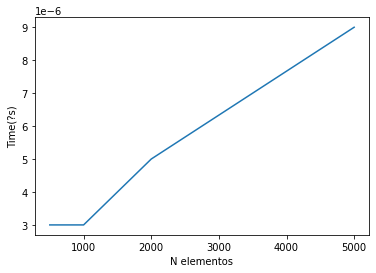

In [ ]:

df = pd.read_csv('/content/Time.csv')

plt.xlabel("N elementos")
plt.ylabel("Time(?s)")
plt.plot([500,1000,1500,2000,5000],df.Time)

plt.show()

#Shift-And Exato
---


### Explicação base

O algoritmo Shift-And é um algoritmo de busca de padrão em um texto. Ele é chamado assim porque ele usa operações de deslocamento e conjunção lógica (AND) para comparar o padrão com o texto.

O algoritmo Shift-And é um algoritmo de busca de padrão eficiente, pois ele é capaz de realizar a busca de um padrão em um texto em tempo linear, ou seja, em tempo proporcional ao tamanho do texto. Isso é possível porque o algoritmo Shift-And usa uma técnica de pré-processamento para criar uma tabela de pesquisa, que é usada para comparar o padrão com o texto de forma rápida e eficiente.

Para usar o algoritmo Shift-And, o primeiro passo é criar a tabela de pesquisa, que é uma matriz de bits. Cada coluna da tabela corresponde a um caractere do padrão e cada linha corresponde a um caractere do alfabeto. A tabela é preenchida de forma que, se o padrão contiver o caractere correspondente à linha, então o bit na coluna correspondente é definido como 1, caso contrário é definido como 0.

Depois de criar a tabela de pesquisa, o algoritmo Shift-And pode ser usado para procurar o padrão no texto. Para isso, o algoritmo inicia com um conjunto de bits chamado "filtro", que é inicializado com todos os bits definidos como 1. Em seguida, o algoritmo lê cada caractere do texto, um de cada vez, e atualiza o filtro usando a tabela de pesquisa. Quando o filtro é atualizado, ele é deslocado para a direita e é conjugado com o valor da tabela de pesquisa correspondente ao caractere lido. Se o filtro for igual a 0 após a atualização, isso significa que o padrão não foi encontrado no texto. Se o filtro for igual a 1 após a atualização, isso significa que o padrão foi encontrado no texto e a posição do padrão no texto é armazenada.

### Diferença

O algoritmo Shift-And é uma técnica de busca de padrão que pode ser usada tanto para buscas exatas quanto para buscas aproximadas. A diferença entre as duas é que, na busca exata, o padrão é procurado no texto exatamente como ele é, sem tolerância a erros ou alterações. Já na busca aproximada, o padrão é procurado no texto com tolerância a erros ou alterações, ou seja, o padrão pode ter algumas diferenças em relação ao que está sendo procurado no texto.

Por exemplo, imagine que você tem um texto e está procurando por uma palavra exata, como "casa". Na busca exata, o algoritmo só considerará a palavra "casa" como um resultado válido se ela aparecer exatamente como está no texto. Já na busca aproximada, o algoritmo pode considerar palavras como "casas", "casal" ou até mesmo "cassa" como resultados válidos, desde que elas tenham alguma similaridade com a palavra procurada.

O algoritmo Shift-And pode ser usado tanto para buscas exatas quanto aproximadas, dependendo da forma como a tabela de pesquisa é criada e do filtro é atualizado durante a busca. Na busca exata, a tabela de pesquisa é criada de forma a considerar apenas os caracteres exatos do padrão e o filtro é atualizado de forma a exigir que todos os caracteres do padrão estejam presentes no texto. Já na busca aproximada, a tabela de pesquisa é criada de forma a considerar caracteres similares ou variantes do padrão e o filtro é atualizado de forma mais flexível, permitindo que alguns caracteres do padrão possam estar ausentes ou alterados no texto.

In [ ]:
%%writefile shiftEx.c
#include <stdio.h>
#include <string.h>
#include <time.h>

#define MAX_LEN 5000

// Preprocess the pattern string to create a bit mask
void preprocess_pattern(char *pattern, unsigned long long *mask)
{
  int i;
  int pattern_len = strlen(pattern);

  for (i = 0; i < pattern_len; i++)
  {
    mask[pattern[i]] |= 1ull << i;
  }
}

// Perform the Shift-And algorithm on the text string
void shift_and(char *text, char *pattern, int *occurrences, int *count)
{
  int i;
  int text_len = strlen(text);
  int pattern_len = strlen(pattern);
  unsigned long long mask[256];
  unsigned long long D = 0;

  // Initialize the bit mask
  for (i = 0; i < 256; i++)
  {
    mask[i] = 0;
  }

  // Preprocess the pattern string
  preprocess_pattern(pattern, mask);

  // Perform the Shift-And algorithm
  for (i = 0; i < text_len; i++)
  {
    D = (D << 1 | 1) & mask[text[i]];
    if (D & (1ull << (pattern_len - 1)))
    {
      occurrences[*count] = i - pattern_len + 1;
      (*count)++;
    }
  }
}

int main(int argc, char *argv[])
{
  char text[MAX_LEN];
  char pattern[MAX_LEN] = "ipsum";
  int occurrences[MAX_LEN];
  int count = 0;
  int i;
  double times[] = {0.0, 0.0, 0.0, 0.0, 0.0};
  clock_t start, end;
  double execution_time;
  size_t textsize, patternsize;

  for (int i = 0; i < 10; i++)
  {
    char text500[] = "Lorem ipsum dolor sit amet, consectetur adipiscing elit. Quisque vel diam lobortis magna viverra hendrerit in mattis quam. Curabitur dapibus mi erat, a lacinia augue bibendum cursus. Duis consequat placerat erat, id gravida justo vulputate ac. ipsum     dignissim massa lectus, ac accumsan neque euismod ut. Donec lorem est, porttitor eget pulvinar id, posuere sed enim. Suspendisse at dui commodo, vestibulum dolor eu, tincidunt mauris. Mauris in sodales dolor. Cras vitae maximus nibh. Fusce in ac";
    for (int i = 0; i < sizeof(text500) / sizeof(text500[0]); i++)
    {
      text[i] = text500[i];
    }
    start = clock();
    shift_and(text, pattern, occurrences, &count);
    end = clock();
    execution_time = ((double)(end - start)) / CLOCKS_PER_SEC;
    times[0] = +execution_time;
    printf("(%zu) Time taken to execute in seconds : %f\n", textsize, execution_time);
  }

  for (int p = 0; p < 10; p++)
  {
    char text1000[] = "Lorem ipsum dolor sit amet,consectetur adipiscing elit. Maecenas efficitur laoreet nulla, eget molestie quam posuere a. Aenean eget sollicitudin nulla. Curabitur pulvinar lectus sit amet nibh semper, et euismod dui tincidunt. Nam eget bibendum orci. Suspendisse eu lacus nec dui hendrerit commodo nec quis diam. Sed vehicula, nisl a maximus aliquet, erat justo consequat tortor, sed eleifend lectus quam vel ipsum. Morbi sit amet leo ut sem finibus facilisis vel ac ligula. Nullam in eros ornare, ullamcorper ipsum et, placerat augue. Vestibulum vitae ligula a eros tempus convallis quis sed diam.Sed vel iaculis nunc, sed ultrices dolor. Mauris pulvinar elit augue, vel maximus nunc consectetur sit amet. In finibus, diam quis commodo feugiat, erat sapien aliquam enim, sit amet sodales eros velit vel sapien. Nunc ullamcorper ultricies orci in suscipit. Aliquam erat volutpat. Phasellus lacinia turpis et molestie aliquam. Pellentesque ac vehicula nisi. Fusce a odio maximus, consequat massa nisi.";
    for (int i = 0; i < sizeof(text1000) / sizeof(text1000[0]); i++)
    {
      text[i] = text1000[i];
    }
    start = clock();
    shift_and(text, pattern, occurrences, &count);
    end = clock();
    execution_time = ((double)(end - start)) / CLOCKS_PER_SEC;
    times[1] += execution_time;
    printf("(%zu) Time taken to execute in seconds : %f\n", textsize, execution_time);
  }

  for (int p = 0; p < 10; p++)
  {
    char text1500[] = "Lorem ipsum dolor sit amet, consectetur adipiscing elit. Quisque id condimentum neque. Donec in erat egestas, efficitur purus et, fringilla dui. Nam id ante in libero congue convallis nec quis urna. Quisque non ex a ante molestie laoreet. Vivamus et nunc in massa gravida tempus a lacinia est. Nullam porttitor gravida urna id suscipit. Sed ut malesuada tellus, vel eleifend odio. Suspendisse faucibus egestas dolor, quis sagittis velit cursus ac. Phasellus dignissim massa nisi, ac pharetra ante sollicitudin et. Nam nec tortor ac enim laoreet pharetra. Phasellus at scelerisque sapien. Praesent malesuada justo lectus, et auctor massa ornare id.Pellentesque condimentum rhoncus lectus, ut elementum orci iaculis sagittis. Suspendisse sit amet lorem massa. Duis varius ultrices cursus. Praesent sed nulla neque. Duis quis nunc risus. Aenean quis ligula vel eros pharetra dapibus. Mauris dui justo, porttitor quis libero sit amet, lobortis convallis lacus. Nulla id nisl id mi rutrum viverra non nec nunc. In a tempus mauris. Nam fermentum sollicitudin lorem, id fermentum enim bibendum id. Integer libero dui, semper eu molestie et, pulvinar vel quam. Donec a convallis quam. Duis quis cursus enim. Mauris diam ipsum, auctor at nulla sit amet, lacinia mollis mi. Curabitur tempus non leo quis suscipit. Vestibulum porta sodales velit, sit amet faucibus purus volutpat a.Cras malesuada enim id ipsum pellentesque varius. Phasellus a est elit. Vestibulum at accumsan tellus, id molestie nisi. Sed dui.";
    for (int i = 0; i < sizeof(text1500) / sizeof(text1500[0]); i++)
    {
      text[i] = text1500[i];
    }
    start = clock();
    shift_and(text, pattern, occurrences, &count);
    end = clock();
    execution_time = ((double)(end - start)) / CLOCKS_PER_SEC;
    times[2] += execution_time;
    printf("(%zu) Time taken to execute in seconds : %f\n", textsize, execution_time);
  }

  for (int p = 0; p < 10; p++)
  {
    char text2000[] = "Lorem ipsum dolor sit amet, consectetur adipiscing elit. Aliquam felis sapien, sodales sed diam non, mollis efficitur magna. Donec at lobortis erat, a aliquet nulla. Curabitur molestie ultricies tincidunt. In tristique, turpis et vulputate feugiat, massa magna porttitor augue, eget efficitur purus sapien et urna. Etiam nisl sapien, eleifend sit amet enim vel, ultricies interdum lorem. Nulla vitae rutrum dolor, ut convallis nisl. Mauris semper commodo lacus aliquam tristique. Nam ac arcu turpis. Sed risus odio, vestibulum eget magna in, malesuada porttitor ex. Donec sit amet ex et mauris tempus condimentum. Quisque justo nunc, eleifend eu dolor in, blandit porta nunc. Nam eget risus id mi accumsan fringilla sed sed elit. Donec non turpis sed leo bibendum efficitur et vel orci. Aenean a quam varius, maximus mauris sed, pharetra orci. Aliquam suscipit felis ac turpis malesuada eleifend. Nam vel nibh non ante blandit ullamcorper.Cras aliquet purus non massa rhoncus auctor ac quis est. Proin vehicula nisl quis massa dictum ultricies. Suspendisse potenti. Pellentesque at lacus at orci scelerisque pretium et efficitur ligula. Aliquam erat volutpat. Morbi velit eros, mollis eu lorem sit amet, egestas suscipit urna. Cras urna eros, auctor ut sodales non, accumsan at ex. Sed eleifend vel urna in faucibus. Nulla suscipit nisl a porttitor iaculis. Aliquam urna sapien, auctor at fermentum vitae, maximus ac arcu.Donec consectetur leo eu dictum cursus. Etiam consequat, massa sed dapibus volutpat, velit quam placerat ligula, in placerat tellus libero in arcu. Integer feugiat ultrices lectus at laoreet. Ut condimentum tortor ac leo cursus, ac posuere leo consequat. Donec placerat ut risus sit amet aliquet. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Cras blandit, mauris ut vehicula accumsan, magna mauris sagittis est, sit amet cursus ante metus euismod magna. Sed tincidunt placerat maximus. Morbi sed magna mauris. Curabitur sit quis.";
    for (int i = 0; i < sizeof(text2000) / sizeof(text2000[0]); i++)
    {
      text[i] = text2000[i];
    }
    start = clock();
    shift_and(text, pattern, occurrences, &count);
    end = clock();
    execution_time = ((double)(end - start)) / CLOCKS_PER_SEC;
    times[3] += execution_time;
    printf("(%zu) Time taken to execute in seconds : %f\n", textsize, execution_time);
  }

  for (int p = 0; p < 10; p++)
  {
    char text5000[] = "Lorem ipsum dolor sit amet, consectetur adipiscing elit. Donec at felis vel nibh blandit venenatis. Donec ipsum dui, iaculis sed sollicitudin et, aliquam fringilla eros. Interdum et malesuada fames ac ante ipsum primis in faucibus. Vestibulum eu volutpat tortor, et tempus mauris. Donec et facilisis velit. Etiam nec dapibus sem, ut efficitur neque. Nulla facilisi. Pellentesque imperdiet, nunc a malesuada aliquam, diam turpis faucibus purus, id iaculis nibh tellus vel elit. Mauris vitae dolor non justo pellentesque dignissim ut et enim. Nunc id ex dui. Maecenas auctor dignissim ipsum, ut luctus nisl aliquam nec. Suspendisse finibus efficitur rhoncus. Nulla at felis rhoncus, dictum lectus vel, dictum nunc. Orci varius natoque penatibus et magnis dis parturient montes, nascetur ridiculus mus.Sed venenatis metus dolor, a sodales velit hendrerit at. Aenean quis elementum ipsum, a semper magna. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Pellentesque ut scelerisque nisl. Sed facilisis sollicitudin ligula, nec feugiat libero consectetur eu. Donec nulla ipsum, dictum id velit at, pretium pellentesque velit. Etiam ut mi at metus imperdiet tristique. Sed et lorem quam.Aenean feugiat fringilla molestie. Praesent aliquam est ac vulputate accumsan. In sit amet libero tempor turpis commodo elementum vitae ac dolor. Aliquam at lobortis est. Integer sagittis tortor dui. Ut vitae iaculis metus. Ut non sem gravida, blandit orci commodo, porttitor tellus. Etiam quis ultrices mauris. Etiam porta, lacus in pellentesque rutrum, massa magna iaculis enim, non placerat sem leo nec enim. Mauris consectetur magna non urna lacinia, et tristique ipsum volutpat. Proin urna mauris, rhoncus quis arcu a, dignissim tempus nulla. Praesent vestibulum urna suscipit dolor consectetur iaculis.Curabitur nec scelerisque orci. Integer venenatis consequat mattis. Vivamus dignissim posuere libero vitae imperdiet. Cras malesuada condimentum nunc in egestas. Ut vitae dui metus. Pellentesque lectus justo, vulputate quis lorem eget, consequat finibus nibh. Phasellus ut aliquet dui. Praesent dapibus, felis dapibus imperdiet scelerisque, nulla enim eleifend risus, a condimentum felis sem id magna. Ut velit urna, fermentum id lacus id, tempor gravida massa. Nulla posuere non ex at dictum. Vestibulum ante ipsum primis in faucibus orci luctus et ultrices posuere cubilia curae; Praesent lacinia odio nec justo sollicitudin, ac tempor massa ullamcorper. Nunc sit amet sem et nisi consectetur scelerisque in a dui. Suspendisse et turpis magna.Sed dignissim finibus nunc eget facilisis. Pellentesque feugiat, purus in bibendum pretium, quam lacus tincidunt libero, et semper lectus massa eget velit. Aenean id cursus dolor. Phasellus varius magna a cursus hendrerit. Ut molestie enim ac turpis tempor suscipit. Integer sed lacus rhoncus, dignissim justo sit amet, ultrices mauris. Vivamus vitae urna aliquet, imperdiet nibh vitae, placerat dolor. Sed condimentum sapien eget eros molestie sollicitudin. Morbi vel neque malesuada, aliquet odio non, viverra velit. Duis vitae justo eget arcu fringilla pretium a non diam. Aliquam nec urna eu sem iaculis tempus. Quisque tincidunt placerat ullamcorper. Sed eros metus, placerat interdum tincidunt sit amet, feugiat nec arcu. Nulla sed porta mi, ut elementum velit.Aenean iaculis posuere nibh, sed tempus enim cursus vel. Sed in enim ut dui blandit interdum ut eget magna. Curabitur eget dui nec nibh hendrerit volutpat. Fusce sollicitudin maximus malesuada. Quisque vitae tempor diam, at gravida diam. Ut non leo a nulla semper dignissim nec id augue. Aliquam mattis dignissim viverra. Maecenas in vestibulum orci. Morbi pharetra sed purus non malesuada.Aliquam tincidunt velit a maximus lobortis. Sed sed tincidunt nisi, eget convallis ligula. In blandit, urna et eleifend tincidunt, elit metus fringilla ligula, et lobortis nibh odio ac lectus. In pretium massa leo, eu cursus nulla dictum in. Sed lacus ex, dictum id ullamcorper a, ultrices sed justo. Fusce tempor aliquet laoreet. Aliquam erat volutpat. Nulla arcu elit, feugiat eu felis venenatis, viverra luctus tellus. Fusce viverra viverra enim at tincidunt. Vestibulum eget mauris at risus auctor rhoncus. Nam id mi in ante egestas vehicula. Nunc elit velit, mattis vitae diam et, tempor consequat eros. Praesent mattis tellus a venenatis vehicula. Suspendisse cursus efficitur ex, eget ornare risus ullamcorper sed. Nullam consequat sem nec ex euismod pellentesque. Vestibulum maximus, massa non euismod tempor, risus metus convallis nulla, in blandit risus nunc sed sem.Quisque molestie massa in tristique fermentum. Maecenas sed dignissim leo. Phasellus pretium placerat diam. Suspendisse congue purus vel quam porttitor lobortis. Duis vel ligula nisi. Morbi et nisl lacinia, ornare turpis nec, hendrerit enim. Maecenas ac iaculis justo, et dapibus lectus. Suspendisse aliquam, elit eu tincidunt fermentum, mauris erat placerat libero, ac pulvinar urna cras.";
    for (int i = 0; i < sizeof(text5000) / sizeof(text5000[0]); i++)
    {
      text[i] = text5000[i];
    }
    start = clock();
    shift_and(text, pattern, occurrences, &count);
    end = clock();
    execution_time = ((double)(end - start)) / CLOCKS_PER_SEC;
    times[4] += execution_time;
    printf("(%zu) Time taken to execute in seconds : %f\n", textsize, execution_time);
  }

  FILE *fpt;
  fpt = fopen("timeShiftAndExact.csv", "w+");
  fprintf(fpt, "Tamanho,Time\n");
  for (int i = 0; i < 5; i++)
  {
    fprintf(fpt, "%d,%f\n", 500*(i+1),times[i] / 10.0);
  }

  fclose(fpt);

  return 0;
}


Writing shiftEx.c


In [ ]:
%%shell

gcc shiftEx.c -o shiftEx
./shiftEx

(0) Time taken to execute in seconds : 0.000006
(0) Time taken to execute in seconds : 0.000005
(0) Time taken to execute in seconds : 0.000005
(0) Time taken to execute in seconds : 0.000005
(0) Time taken to execute in seconds : 0.000005
(0) Time taken to execute in seconds : 0.000005
(0) Time taken to execute in seconds : 0.000005
(0) Time taken to execute in seconds : 0.000004
(0) Time taken to execute in seconds : 0.000005
(0) Time taken to execute in seconds : 0.000004
(0) Time taken to execute in seconds : 0.000007
(0) Time taken to execute in seconds : 0.000007
(0) Time taken to execute in seconds : 0.000007
(0) Time taken to execute in seconds : 0.000007
(0) Time taken to execute in seconds : 0.000007
(0) Time taken to execute in seconds : 0.000008
(0) Time taken to execute in seconds : 0.000008
(0) Time taken to execute in seconds : 0.000007
(0) Time taken to execute in seconds : 0.000008
(0) Time taken to execute in seconds : 0.000008
(0) Time taken to execute in seconds : 0

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
shif_ex = pd.read_csv("timeShiftAndExact.csv")

In [ ]:
shif_ex = shif_ex.replace(2500, 5000)
shif_ex

,Tamanho,Time
0,500,0.000000
1,1000,0.000007
2,1500,0.000010
3,2000,0.000015
4,5000,0.000031


<function matplotlib.pyplot.show(*args, **kw)>

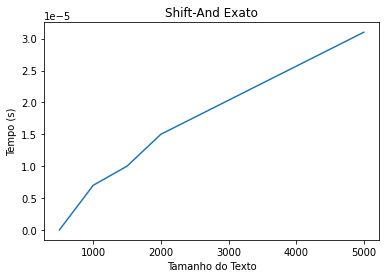

In [ ]:
plt.yticks(np.arange(shif_ex.Time.min(), shif_ex.Time.max(), 0.000005))
plt.plot(shif_ex.Tamanho, shif_ex.Time, label="Shift-And Exato")
plt.title("Shift-And Exato")
plt.ylabel("Tempo (s)")
plt.xlabel("Tamanho do Texto")
plt.savefig("shift_and_exat.png")
plt.show

#Shift-And Aproximado
---

O algoritmo Shift-And aproximado é uma variante do algoritmo Shift-And que é usada para realizar buscas aproximadas de um padrão em um texto. Na busca aproximada, o padrão é procurado no texto com tolerância a erros ou alterações, ou seja, o padrão pode ter algumas diferenças em relação ao que está sendo procurado no texto.

Para usar o algoritmo Shift-And aproximado, o primeiro passo é criar a tabela de pesquisa, que é uma matriz de bits. Cada coluna da tabela corresponde a um caractere do padrão e cada linha corresponde a um caractere do alfabeto. A tabela é preenchida de forma que, se o padrão ou um caractere similar a ele contiver o caractere correspondente à linha, então o bit na coluna correspondente é definido como 1, caso contrário é definido como 0. Por exemplo, se o padrão for "casa" e a tabela for criada para considerar caracteres similares, então os bits correspondentes aos caracteres "s" e "c" serão definidos como 1 na linha "s", enquanto o bit correspondente ao caractere "a" será definido como 1 nas linhas "a", "á" e "ã".

Depois de criar a tabela de pesquisa, o algoritmo Shift-And aproximado pode ser usado para procurar o padrão no texto. Para isso, o algoritmo inicia com um conjunto de bits chamado "filtro", que é inicializado com todos os bits definidos como 1. Em seguida, o algoritmo lê cada caractere do texto, um de cada vez, e atualiza o filtro usando a tabela de pesquisa. Quando o filtro é atualizado, ele é deslocado para a direita e é conjugado com o valor da tabela de pesquisa correspondente ao caractere lido. Se o filtro for igual a 0 após a atualização, isso significa que o padrão não foi encontrado no texto. Se o filtro for igual a 1 após a atualização, isso significa que o padrão foi encontrado no texto e a posição do padrão no texto é armazenada.

O algoritmo Shift-And aproximado é eficiente para realizar buscas aproximadas de um padrão em um texto, pois ele é capaz de realizar a busca em tempo linear, ou seja, em tempo proporcional ao tamanho do texto. Isso é possível porque o algoritmo usa uma técnica de pré-processamento para criar a tabela

In [ ]:
%%writefile shift_app.c

#include <stdio.h>
#include <string.h>
#include <time.h>

#define MAX_LEN 5000

// Executa o pattern no texto de entrada
void preprocess_pattern(char *pattern, unsigned long long *mascara, int k) {
  int i;
  int patternLen = strlen(pattern);

  for (i = 0; i < patternLen; i++) {
    mascara[pattern[i]] |= 1ULL << i;
  }

  for (i = 0; i < k; i++) {
    mascara[i] |= 1ULL << (patternLen + i);
  }
}

// Algoritmo de casamento de letras
void approximate_shift_and(char *texto, char *pattern, int k, int *ocorrencias, int *matchEncontrados) {
  int i;
  int texto_len = strlen(texto);
  int patternLen = strlen(pattern);
  unsigned long long mascara[256];
  unsigned long long D = 0;

  // Inicializa a mascara de bits para o pattern
  for (i = 0; i < 256; i++) {
    mascara[i] = 0;
  }

  // Preprocess the pattern string
  preprocess_pattern(pattern, mascara, k);

  // Conta a quantidade de ocorrencias e armazena o index
  for (i = 0; i < texto_len; i++) {
    D = (D << 1 | 1) & mascara[texto[i]];
    if ((D >> k) & 1) {
      ocorrencias[*matchEncontrados] = i - patternLen + 1;
      (*matchEncontrados)++;
    }
  }
}

int main2(int argc, char *argv[]) {
  char texto[MAX_LEN];
  char pattern[MAX_LEN];
  int k = 1;
  int ocorrencias[MAX_LEN];
  int matchEncontrados = 0;
  int i;

  // Entrada dos textoos e do pattern
  printf("Entre com o texto: ");
  scanf("%s", texto);
  printf("O valor a ser encontrado: ");
  scanf("%s", pattern);
  printf("Quantidade maxima de erros (0 < k < m): ");
  scanf("%d", &k);

  approximate_shift_and(texto, pattern, k, ocorrencias, &matchEncontrados);

  // Exibe o index das ocorrencias.
  if (matchEncontrados == 0) {
    printf("Não foi encontrado neste texto\n");
  } else {
    printf("Foi encontrado correspondencia nos indices: ");
    for (i = 0; i < matchEncontrados; i++) {
      printf("%d ", ocorrencias[i]);
    }
    printf("\n");
  }

  return 0;
}
int main(int argc, char *argv[])
{
  char text[MAX_LEN];
  char pattern[MAX_LEN] = "ipsum";
  int occurrences[MAX_LEN];
  int k = 2;
  int ocorrencias[MAX_LEN];
  int matchEncontrados = 0;
  int i;

  double times[] = {0.0, 0.0, 0.0, 0.0, 0.0};
  clock_t start, end;
  double execution_time;
  size_t textsize, patternsize;

  for (int i = 0; i < 10; i++)
  {
    char text500[] = "Lorem ipsum dolor sit amet, consectetur adipiscing elit. Quisque vel diam lobortis magna viverra hendrerit in mattis quam. Curabitur dapibus mi erat, a lacinia augue bibendum cursus. Duis consequat placerat erat, id gravida justo vulputate ac. ipsum     dignissim massa lectus, ac accumsan neque euismod ut. Donec lorem est, porttitor eget pulvinar id, posuere sed enim. Suspendisse at dui commodo, vestibulum dolor eu, tincidunt mauris. Mauris in sodales dolor. Cras vitae maximus nibh. Fusce in ac";
    for (int i = 0; i < sizeof(text500) / sizeof(text500[0]); i++)
    {
      text[i] = text500[i];
    }
    start = clock();
    approximate_shift_and(text, pattern, k, ocorrencias, &matchEncontrados);
    end = clock();
    execution_time = ((double)(end - start)) / CLOCKS_PER_SEC;
    times[0] = +execution_time;
    printf("(%zu) Time taken to execute in seconds : %f\n", textsize, execution_time);
  }

  for (int p = 0; p < 10; p++)
  {
    char text1000[] = "Lorem ipsum dolor sit amet,consectetur adipiscing elit. Maecenas efficitur laoreet nulla, eget molestie quam posuere a. Aenean eget sollicitudin nulla. Curabitur pulvinar lectus sit amet nibh semper, et euismod dui tincidunt. Nam eget bibendum orci. Suspendisse eu lacus nec dui hendrerit commodo nec quis diam. Sed vehicula, nisl a maximus aliquet, erat justo consequat tortor, sed eleifend lectus quam vel ipsum. Morbi sit amet leo ut sem finibus facilisis vel ac ligula. Nullam in eros ornare, ullamcorper ipsum et, placerat augue. Vestibulum vitae ligula a eros tempus convallis quis sed diam.Sed vel iaculis nunc, sed ultrices dolor. Mauris pulvinar elit augue, vel maximus nunc consectetur sit amet. In finibus, diam quis commodo feugiat, erat sapien aliquam enim, sit amet sodales eros velit vel sapien. Nunc ullamcorper ultricies orci in suscipit. Aliquam erat volutpat. Phasellus lacinia turpis et molestie aliquam. Pellentesque ac vehicula nisi. Fusce a odio maximus, consequat massa nisi.";
    for (int i = 0; i < sizeof(text1000) / sizeof(text1000[0]); i++)
    {
      text[i] = text1000[i];
    }
    start = clock();
    approximate_shift_and(text, pattern, k, ocorrencias, &matchEncontrados);
    end = clock();
    execution_time = ((double)(end - start)) / CLOCKS_PER_SEC;
    times[1] += execution_time;
    printf("(%zu) Time taken to execute in seconds : %f\n", textsize, execution_time);
  }

  for (int p = 0; p < 10; p++)
  {
    char text1500[] = "Lorem ipsum dolor sit amet, consectetur adipiscing elit. Quisque id condimentum neque. Donec in erat egestas, efficitur purus et, fringilla dui. Nam id ante in libero congue convallis nec quis urna. Quisque non ex a ante molestie laoreet. Vivamus et nunc in massa gravida tempus a lacinia est. Nullam porttitor gravida urna id suscipit. Sed ut malesuada tellus, vel eleifend odio. Suspendisse faucibus egestas dolor, quis sagittis velit cursus ac. Phasellus dignissim massa nisi, ac pharetra ante sollicitudin et. Nam nec tortor ac enim laoreet pharetra. Phasellus at scelerisque sapien. Praesent malesuada justo lectus, et auctor massa ornare id.Pellentesque condimentum rhoncus lectus, ut elementum orci iaculis sagittis. Suspendisse sit amet lorem massa. Duis varius ultrices cursus. Praesent sed nulla neque. Duis quis nunc risus. Aenean quis ligula vel eros pharetra dapibus. Mauris dui justo, porttitor quis libero sit amet, lobortis convallis lacus. Nulla id nisl id mi rutrum viverra non nec nunc. In a tempus mauris. Nam fermentum sollicitudin lorem, id fermentum enim bibendum id. Integer libero dui, semper eu molestie et, pulvinar vel quam. Donec a convallis quam. Duis quis cursus enim. Mauris diam ipsum, auctor at nulla sit amet, lacinia mollis mi. Curabitur tempus non leo quis suscipit. Vestibulum porta sodales velit, sit amet faucibus purus volutpat a.Cras malesuada enim id ipsum pellentesque varius. Phasellus a est elit. Vestibulum at accumsan tellus, id molestie nisi. Sed dui.";
    for (int i = 0; i < sizeof(text1500) / sizeof(text1500[0]); i++)
    {
      text[i] = text1500[i];
    }
    start = clock();
    approximate_shift_and(text, pattern, k, ocorrencias, &matchEncontrados);
    end = clock();
    execution_time = ((double)(end - start)) / CLOCKS_PER_SEC;
    times[2] += execution_time;
    printf("(%zu) Time taken to execute in seconds : %f\n", textsize, execution_time);
  }

  for (int p = 0; p < 10; p++)
  {
    char text2000[] = "Lorem ipsun dolor sit amet, consectetur adipiscing elit. Aliquam felis sapien, sodales sed diam non, mollis efficitur magna. Donec at lobortis erat, a aliquet nulla. Curabitur molestie ultricies tincidunt. In tristique, turpis et vulputate feugiat, massa magna porttitor augue, eget efficitur purus sapien et urna. Etiam nisl sapien, eleifend sit amet enim vel, ultricies interdum lorem. Nulla vitae rutrum dolor, ut convallis nisl. Mauris semper commodo lacus aliquam tristique. Nam ac arcu turpis. Sed risus odio, vestibulum eget magna in, malesuada porttitor ex. Donec sit amet ex et mauris tempus condimentum. Quisque justo nunc, eleifend eu dolor in, blandit porta nunc. Nam eget risus id mi accumsan fringilla sed sed elit. Donec non turpis sed leo bibendum efficitur et vel orci. Aenean a quam varius, maximus mauris sed, pharetra orci. Aliquam suscipit felis ac turpis malesuada eleifend. Nam vel nibh non ante blandit ullamcorper.Cras aliquet purus non massa rhoncus auctor ac quis est. Proin vehicula nisl quis massa dictum ultricies. Suspendisse potenti. Pellentesque at lacus at orci scelerisque pretium et efficitur ligula. Aliquam erat volutpat. Morbi velit eros, mollis eu lorem sit amet, egestas suscipit urna. Cras urna eros, auctor ut sodales non, accumsan at ex. Sed eleifend vel urna in faucibus. Nulla suscipit nisl a porttitor iaculis. Aliquam urna sapien, auctor at fermentum vitae, maximus ac arcu.Donec consectetur leo eu dictum cursus. Etiam consequat, massa sed dapibus volutpat, velit quam placerat ligula, in placerat tellus libero in arcu. Integer feugiat ultrices lectus at laoreet. Ut condimentum tortor ac leo cursus, ac posuere leo consequat. Donec placerat ut risus sit amet aliquet. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Cras blandit, mauris ut vehicula accumsan, magna mauris sagittis est, sit amet cursus ante metus euismod magna. Sed tincidunt placerat maximus. Morbi sed magna mauris. Curabitur sit quis.";
    for (int i = 0; i < sizeof(text2000) / sizeof(text2000[0]); i++)
    {
      text[i] = text2000[i];
    }
    start = clock();
    approximate_shift_and(text, pattern, k, ocorrencias, &matchEncontrados);
    end = clock();
    execution_time = ((double)(end - start)) / CLOCKS_PER_SEC;
    times[3] += execution_time;
    printf("(%zu) Time taken to execute in seconds : %f\n", textsize, execution_time);
  }

  for (int p = 0; p < 10; p++)
  {
    char text5000[] = "Lorem ipsum dolor sit amet, consectetur adipiscing elit. Donec at felis vel nibh blandit venenatis Donec ipsum dui, iaculis sed sollicitudin et, aliquam fringilla eros. Interdum et malesuada fames ac ante ipsum primis in faucibus. Vestibulum eu volutpat tortor, et tempus mauris. Donec et facilisis velit. Etiam nec dapibus sem, ut efficitur neque. Nulla facilisi. Pellentesque imperdiet, nunc a malesuada aliquam, diam turpis faucibus purus, id iaculis nibh tellus vel elit. Mauris vitae dolor non justo pellentesque dignissim ut et enim. Nunc id ex dui. Maecenas auctor dignissim ipsum, ut luctus nisl aliquam nec. Suspendisse finibus efficitur rhoncus. Nulla at felis rhoncus, dictum lectus vel, dictum nunc. Orci varius natoque penatibus et magnis dis parturient montes, nascetur ridiculus mus.Sed venenatis metus dolor, a sodales velit hendrerit at. Aenean quis elementum ipsum, a semper magna. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Pellentesque ut scelerisque nisl. Sed facilisis sollicitudin ligula, nec feugiat libero consectetur eu. Donec nulla ipsum, dictum id velit at, pretium pellentesque velit. Etiam ut mi at metus imperdiet tristique. Sed et lorem quam.Aenean feugiat fringilla molestie. Praesent aliquam est ac vulputate accumsan. In sit amet libero tempor turpis commodo elementum vitae ac dolor. Aliquam at lobortis est. Integer sagittis tortor dui. Ut vitae iaculis metus. Ut non sem gravida, blandit orci commodo, porttitor tellus. Etiam quis ultrices mauris. Etiam porta, lacus in pellentesque rutrum, massa magna iaculis enim, non placerat sem leo nec enim. Mauris consectetur magna non urna lacinia, et tristique ipsum volutpat. Proin urna mauris, rhoncus quis arcu a, dignissim tempus nulla. Praesent vestibulum urna suscipit dolor consectetur iaculis.Curabitur nec scelerisque orci. Integer venenatis consequat mattis. Vivamus dignissim posuere libero vitae imperdiet. Cras malesuada condimentum nunc in egestas. Ut vitae dui metus. Pellentesque lectus justo, vulputate quis lorem eget, consequat finibus nibh. Phasellus ut aliquet dui. Praesent dapibus, felis dapibus imperdiet scelerisque, nulla enim eleifend risus, a condimentum felis sem id magna. Ut velit urna, fermentum id lacus id, tempor gravida massa. Nulla posuere non ex at dictum. Vestibulum ante ipsum primis in faucibus orci luctus et ultrices posuere cubilia curae; Praesent lacinia odio nec justo sollicitudin, ac tempor massa ullamcorper. Nunc sit amet sem et nisi consectetur scelerisque in a dui. Suspendisse et turpis magna.Sed dignissim finibus nunc eget facilisis. Pellentesque feugiat, purus in bibendum pretium, quam lacus tincidunt libero, et semper lectus massa eget velit. Aenean id cursus dolor. Phasellus varius magna a cursus hendrerit. Ut molestie enim ac turpis tempor suscipit. Integer sed lacus rhoncus, dignissim justo sit amet, ultrices mauris. Vivamus vitae urna aliquet, imperdiet nibh vitae, placerat dolor. Sed condimentum sapien eget eros molestie sollicitudin. Morbi vel neque malesuada, aliquet odio non, viverra velit. Duis vitae justo eget arcu fringilla pretium a non diam. Aliquam nec urna eu sem iaculis tempus. Quisque tincidunt placerat ullamcorper. Sed eros metus, placerat interdum tincidunt sit amet, feugiat nec arcu. Nulla sed porta mi, ut elementum velit.Aenean iaculis posuere nibh, sed tempus enim cursus vel. Sed in enim ut dui blandit interdum ut eget magna. Curabitur eget dui nec nibh hendrerit volutpat. Fusce sollicitudin maximus malesuada. Quisque vitae tempor diam, at gravida diam. Ut non leo a nulla semper dignissim nec id augue. Aliquam mattis dignissim viverra. Maecenas in vestibulum orci. Morbi pharetra sed purus non malesuada.Aliquam tincidunt velit a maximus lobortis. Sed sed tincidunt nisi, eget convallis ligula. In blandit, urna et eleifend tincidunt, elit metus fringilla ligula, et lobortis nibh odio ac lectus. In pretium massa leo, eu cursus nulla dictum in. Sed lacus ex, dictum id ullamcorper a, ultrices sed justo. Fusce tempor aliquet laoreet. Aliquam erat volutpat. Nulla arcu elit, feugiat eu felis venenatis, viverra luctus tellus. Fusce viverra viverra enim at tincidunt. Vestibulum eget mauris at risus auctor rhoncus. Nam id mi in ante egestas vehicula. Nunc elit velit, mattis vitae diam et, tempor consequat eros. Praesent mattis tellus a venenatis vehicula. Suspendisse cursus efficitur ex, eget ornare risus ullamcorper sed. Nullam consequat sem nec ex euismod pellentesque. Vestibulum maximus, massa non euismod tempor, risus metus convallis nulla, in blandit risus nunc sed sem.Quisque molestie massa in tristique fermentum. Maecenas sed dignissim leo. Phasellus pretium placerat diam. Suspendisse congue purus vel quam porttitor lobortis. Duis vel ligula nisi. Morbi et nisl lacinia, ornare turpis nec, hendrerit enim. Maecenas ac iaculis justo, et dapibus lectus. Suspendisse aliquam, elit eu tincidunt fermentum, mauris erat placerat libero, ac pulvinar urna cras.";
    for (int i = 0; i < sizeof(text5000) / sizeof(text5000[0]); i++)
    {
      text[i] = text5000[i];
    }
    start = clock();
    approximate_shift_and(text, pattern, k, ocorrencias, &matchEncontrados);
    end = clock();
    execution_time = ((double)(end - start)) / CLOCKS_PER_SEC;
    times[4] += execution_time;
    printf("(%zu) Time taken to execute in seconds : %f\n", textsize, execution_time);
  }

  FILE *fpt;
  fpt = fopen("timeShiftAndApp_k1.csv", "w+");
  fprintf(fpt, "Tamanho,Time\n");
  for (int i = 0; i < 5; i++)
  {
    fprintf(fpt, "%d,%f\n", 500*(i+1),times[i] / 10.0);
  }

  fclose(fpt);

  return 0;
}


Overwriting shift_app.c


In [ ]:
%%shell

gcc shift_app.c -o shift_app
./shift_app


(0) Time taken to execute in seconds : 0.000005
(0) Time taken to execute in seconds : 0.000004
(0) Time taken to execute in seconds : 0.000003
(0) Time taken to execute in seconds : 0.000003
(0) Time taken to execute in seconds : 0.000002
(0) Time taken to execute in seconds : 0.000003
(0) Time taken to execute in seconds : 0.000003
(0) Time taken to execute in seconds : 0.000003
(0) Time taken to execute in seconds : 0.000003
(0) Time taken to execute in seconds : 0.000003
(0) Time taken to execute in seconds : 0.000004
(0) Time taken to execute in seconds : 0.000005
(0) Time taken to execute in seconds : 0.000005
(0) Time taken to execute in seconds : 0.000004
(0) Time taken to execute in seconds : 0.000004
(0) Time taken to execute in seconds : 0.000004
(0) Time taken to execute in seconds : 0.000004
(0) Time taken to execute in seconds : 0.000004
(0) Time taken to execute in seconds : 0.000005
(0) Time taken to execute in seconds : 0.000005
(0) Time taken to execute in seconds : 0

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
shif_ap_k1 = pd.read_csv("timeShiftAndApp_k1.csv")
shif_ap_k2 = pd.read_csv("timeShiftAndApp_k2.csv")

In [ ]:
shif_ap_k1 = shif_ap_k1.replace(2500, 5000)
shif_ap_k2 = shif_ap_k2.replace(2500, 5000)


In [ ]:
shif_ap_k1["Time k=2"] = shif_ap_k2.Time
shif_ap_k1

,Tamanho,Time,Time k=2
0,500,0.000000,0.000001
1,1000,0.000004,0.000013
2,1500,0.000009,0.000010
3,2000,0.000008,0.000013
4,5000,0.000019,0.000031


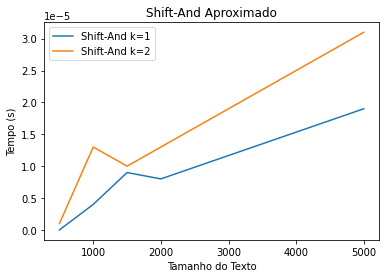

In [ ]:
plt.plot(shif_ap_k1.Tamanho, shif_ap_k1.Time, label="Shift-And k=1")
plt.plot(shif_ap_k1.Tamanho, shif_ap_k1["Time k=2"], label="Shift-And k=2")
plt.title("Shift-And Aproximado")
plt.savefig("shift_and.png")
plt.ylabel("Tempo (s)")
plt.xlabel("Tamanho do Texto")
plt.legend()
plt.savefig("shift_and.png")
plt.show()

#Testes
---

😈  Roda todos os testes juntos

In [ ]:
%%writefile runTests.c
#include <stdio.h>
#include <string.h>
#include <limits.h>
#include <time.h>


//###################################################
/* bf */

void bf(char* txt, int txtLen, char* pattern, int patternLen){
    //int M = strlen(pattern);
    int M = patternLen;
    //int N  = strlen(txt);
    int N = txtLen;
    int j = 0;
    for(int i = 0; i <= N - M; i++){
        for(j = 0; j < M; j++){
            if(txt[i + j] != pattern[j]){
                break;
            }
        }
        if(j == M){ // if pattern[0...M-1] = txt[i, i+1, ...i+M-1]
            printf("Pattern found starting at i = %d and ending at j = %d\n", i, i+j-1);

        }
    }
}

//###################################################
/* bmh */

# define N_CHARS 256


int max (int a, int b) {
  if(a > b){return a;}
  else{return b;}
}

void badCharHeuristic( char *str, int size,
						int badchar[N_CHARS])
{
	int i;

	for (i = 0; i < N_CHARS; i++)
		badchar[i] = -1;

	for (i = 0; i < size; i++)
		badchar[(int) str[i]] = i;
}

void bmh(char* txt, int txtLen, char* pattern, int patternLen)
{
	//int m = strlen(pattern);
	//int n = strlen(txt);

  int m = patternLen;

  int n = txtLen;

	int badchar[N_CHARS];

	badCharHeuristic(pattern, m, badchar);

	int s = 0; 
				
	while(s <= (n - m)){
		int j = m-1;

		while(j >= 0 && pattern[j] == txt[s+j])
			j--;

		if (j < 0){
			printf("\n pattern found at shift i = %d", s);

			if(s+m < n){
				s += m-badchar[txt[s+m]];
			}
			else{
				s++;
			}
		}

		else
			s += max(1, j - badchar[txt[s+j]]);
	}
}

//###################################################
/* bmhs */

void bmhs(char* text, int textLength, char* pattern, int patternLength) {
  int maxChar = 256;
  int displacement[maxChar];
  // Assign default value to all letters
  for (int j = 0 ; j < maxChar; j++) {
    displacement[j] = patternLength + 1;
  }
  // Pattern letters shift value
  // Since the index starts at 0, it is not necessary to add 1
  for (int letterIndex = 0; letterIndex < patternLength; letterIndex++) {
    displacement[pattern[letterIndex]] =  patternLength - letterIndex;
  }

  // Adjust index to avoid out of bound error
  int i = patternLength - 1;
  
  while (i < textLength) {
    int textLetterIndex = i; 
    int patternLetterIndex = patternLength - 1;

    // Compare from right to left
    while ((patternLetterIndex >= 0) && (text[textLetterIndex] == pattern[patternLetterIndex])) { 
      patternLetterIndex--;
      textLetterIndex--;
    }
    
    // Match found in all pattern letters 
    if (patternLetterIndex < 0) {
      printf("Match from position %d to position %d", textLetterIndex + 1, textLetterIndex + patternLength - 1); //adicionei -1 henrique
    }
    // Shift the text pattern 
    i = i + displacement[text[textLetterIndex+1]]; 
  }
}
//###################################################
/* shift_ex */

#define MAX_LEN 5000

// Preprocess the pattern string to create a bit mask
void preprocess_pattern(char *pattern, unsigned long long *mask) {
  int i;
  int pattern_len = strlen(pattern);

  for (i = 0; i < pattern_len; i++) {
    mask[pattern[i]] |= 1ull << i;
  }
}

// Perform the Shift-And algorithm on the text string
void shift_and(char *text, char *pattern, int *occurrences, int *count) {
  int i;
  int text_len = strlen(text);
  int pattern_len = strlen(pattern);
  unsigned long long mask[256];
  unsigned long long D = 0;

  // Initialize the bit mask
  for (i = 0; i < 256; i++) {
    mask[i] = 0;
  }

  // Preprocess the pattern string
  preprocess_pattern(pattern, mask);

  // Perform the Shift-And algorithm
  for (i = 0; i < text_len; i++) {
    D = (D << 1 | 1) & mask[text[i]];
    if (D & (1ull << (pattern_len - 1))) {
      occurrences[*count] = i - pattern_len + 1;
      (*count)++;
    }
  }
}



//###################################################
/* shift_apx */
//#define MAX_LEN 5000

// Executa o pattern no texto de entrada
void preprocess_pattern2(char *pattern, unsigned long long *mascara, int k) {
  int i;
  int patternLen = strlen(pattern);

  for (i = 0; i < patternLen; i++) {
    mascara[pattern[i]] |= 1ULL << i;
  }

  for (i = 0; i < k; i++) {
    mascara[i] |= 1ULL << (patternLen + i);
  }
}

// Algoritmo de casamento de letras
void approximate_shift_and(char *texto, char *pattern, int k, int *ocorrencias, int *matchEncontrados) {
  int i;
  int texto_len = strlen(texto);
  int patternLen = strlen(pattern);
  unsigned long long mascara[256];
  unsigned long long D = 0;

  // Inicializa a mascara de bits para o pattern
  for (i = 0; i < 256; i++) {
    mascara[i] = 0;
  }

  // Preprocess the pattern string
  preprocess_pattern2(pattern, mascara, k);

  // Conta a quantidade de ocorrencias e armazena o index
  for (i = 0; i < texto_len; i++) {
    D = (D << 1 | 1) & mascara[texto[i]];
    if ((D >> k) & 1) {
      ocorrencias[*matchEncontrados] = i - patternLen + 1;
      (*matchEncontrados)++;
    }
  }
}

//###############################################











/*Main*/
int main(){
  FILE *fpt;

  double timesBf[] = {0.0, 0.0, 0.0, 0.0, 0.0};
  double timesBmh[] = {0.0, 0.0, 0.0, 0.0, 0.0};
  double timesBmhs[] = {0.0, 0.0, 0.0, 0.0, 0.0};
  double timesShiftEx[] = {0.0, 0.0, 0.0, 0.0, 0.0};
  double timesShiftApx[] = {0.0, 0.0, 0.0, 0.0, 0.0};

  clock_t start, end;
  double execution_time;
  size_t textsize, patternsize;
  
  char text[MAX_LEN];
  char pattern[MAX_LEN];
  int occurrences[MAX_LEN];
  int count = 0;
  int i;

  int k = 2;
  int ocorrencias[MAX_LEN];
  int matchEncontrados = 0;

  //N de rodadas para calcular a media
  int avgCount = 100;

  for(i = 0; i <= avgCount; i++){
    // Text with 500 caracters
    char text500[] = "Lorem ipsum dolor sit amet, consectetur adipiscing elit. Quisque vel diam lobortis magna viverra hendrerit in mattis quam. Curabitur dapibus mi erat, a lacinia augue bibendum cursus. Duis consequat placerat erat, id gravida justo vulputate ac. Phasellus dignissim massa lectus, ac accumsan neque euismod ut. Donec lorem est, porttitor eget pulvinar id, posuere sed enim. Suspendisse at dui commodo, vestibulum dolor eu, tincidunt mauris. Mauris in sodales dolor. Cras vitae maximus nibh. Fusce in ac.";
    char pattern500[] = "ipsum";
    textsize = sizeof(text500)/sizeof(text500[0]);
    patternsize = sizeof(pattern500)/sizeof(pattern500[0]); 

    //Time measure
    start = clock();
    bf(text500, textsize, pattern500, patternsize);
    end = clock();
    execution_time = ((double)(end - start))/CLOCKS_PER_SEC;
    timesBf[0] += execution_time;
    printf("(%zu) Brute force; Time taken to execute in seconds : %f\n", textsize, execution_time);


    start = clock();
    bmh(text500, textsize, pattern500, patternsize);
    end = clock();
    execution_time = ((double)(end - start))/CLOCKS_PER_SEC;
    timesBmh[0] += execution_time;
    printf("(%zu) BMH; Time taken to execute in seconds : %f\n", textsize, execution_time);

    
    start = clock();
    bmhs(text500, textsize, pattern500, patternsize);
    end = clock();
    execution_time = ((double)(end - start))/CLOCKS_PER_SEC;
    timesBmhs[0] += execution_time;
    printf("(%zu) BMH; Time taken to execute in seconds : %f\n", textsize, execution_time);

    
    start = clock();
    shift_and(text500, pattern500, occurrences, &count);
    end = clock();
    execution_time = ((double)(end - start))/CLOCKS_PER_SEC;
    timesShiftEx[0] += execution_time;
    printf("(%zu) Shift-And Exato; Time taken to execute in seconds : %f\n", textsize, execution_time);

    
    //shiftApx
    start = clock();
    approximate_shift_and(text500, pattern500, k, ocorrencias, &matchEncontrados);
    end = clock();
    execution_time = ((double)(end - start))/CLOCKS_PER_SEC;
    timesShiftApx[0] += execution_time;
    printf("(%zu) Shift-And Aproximado; Time taken to execute in seconds : %f\n", textsize, execution_time);

    
    



    // Text with 1000 caracters
    char text1000[] = "Lorem ipsum dolor sit amet, consectetur adipiscing elit. Maecenas efficitur laoreet nulla, eget molestie quam posuere a. Aenean eget sollicitudin nulla. Curabitur pulvinar lectus sit amet nibh semper, et euismod dui tincidunt. Nam eget bibendum orci. Suspendisse eu lacus nec dui hendrerit commodo nec quis diam. Sed vehicula, nisl a maximus aliquet, erat justo consequat tortor, sed eleifend lectus quam vel ipsum. Morbi sit amet leo ut sem finibus facilisis vel ac ligula. Nullam in eros ornare, ullamcorper ipsum et, placerat augue. Vestibulum vitae ligula a eros tempus convallis quis sed diam.Sed vel iaculis nunc, sed ultrices dolor. Mauris pulvinar elit augue, vel maximus nunc consectetur sit amet. In finibus, diam quis commodo feugiat, erat sapien aliquam enim, sit amet sodales eros velit vel sapien. Nunc ullamcorper ultricies orci in suscipit. Aliquam erat volutpat. Phasellus lacinia turpis et molestie aliquam. Pellentesque ac vehicula nisi. Fusce a odio maximus, consequat massa nisi.";
    char pattern1000[] = "ipsum";
    textsize = sizeof(text1000)/sizeof(text1000[0]);
    patternsize = sizeof(pattern1000)/sizeof(pattern1000[0]); 

    //Time measure
    start = clock();
    bf(text1000, textsize, pattern1000, patternsize);
    end = clock();
    execution_time = ((double)(end - start))/CLOCKS_PER_SEC;
    timesBf[1] += execution_time;
    printf("(%zu) Brute force; Time taken to execute in seconds : %f\n", textsize, execution_time);


    start = clock();
    bmh(text1000, textsize, pattern1000, patternsize);
    end = clock();
    execution_time = ((double)(end - start))/CLOCKS_PER_SEC;
    timesBmh[1] += execution_time;
    printf("(%zu) BMH; Time taken to execute in seconds : %f\n", textsize, execution_time);

    
    start = clock();
    bmhs(text1000, textsize, pattern1000, patternsize);
    end = clock();
    execution_time = ((double)(end - start))/CLOCKS_PER_SEC;
    timesBmhs[1] += execution_time;
    printf("(%zu) BMH; Time taken to execute in seconds : %f\n", textsize, execution_time);

    
    start = clock();
    shift_and(text1000, pattern1000, occurrences, &count);
    end = clock();
    execution_time = ((double)(end - start))/CLOCKS_PER_SEC;
    timesShiftEx[1] += execution_time;
    printf("(%zu) Shift-And Exato; Time taken to execute in seconds : %f\n", textsize, execution_time);

    
    //shiftApx
    start = clock();
    approximate_shift_and(text1000, pattern1000, k, ocorrencias, &matchEncontrados);
    end = clock();
    execution_time = ((double)(end - start))/CLOCKS_PER_SEC;
    timesShiftApx[1] += execution_time;
    printf("(%zu) Shift-And Aproximado; Time taken to execute in seconds : %f\n", textsize, execution_time);






    // Text with 1500 caracters
    char text1500[] = "Lorem ipsum dolor sit amet, consectetur adipiscing elit. Quisque id condimentum neque. Donec in erat egestas, efficitur purus et, fringilla dui. Nam id ante in libero congue convallis nec quis urna. Quisque non ex a ante molestie laoreet. Vivamus et nunc in massa gravida tempus a lacinia est. Nullam porttitor gravida urna id suscipit. Sed ut malesuada tellus, vel eleifend odio. Suspendisse faucibus egestas dolor, quis sagittis velit cursus ac. Phasellus dignissim massa nisi, ac pharetra ante sollicitudin et. Nam nec tortor ac enim laoreet pharetra. Phasellus at scelerisque sapien. Praesent malesuada justo lectus, et auctor massa ornare id.Pellentesque condimentum rhoncus lectus, ut elementum orci iaculis sagittis. Suspendisse sit amet lorem massa. Duis varius ultrices cursus. Praesent sed nulla neque. Duis quis nunc risus. Aenean quis ligula vel eros pharetra dapibus. Mauris dui justo, porttitor quis libero sit amet, lobortis convallis lacus. Nulla id nisl id mi rutrum viverra non nec nunc. In a tempus mauris. Nam fermentum sollicitudin lorem, id fermentum enim bibendum id. Integer libero dui, semper eu molestie et, pulvinar vel quam. Donec a convallis quam. Duis quis cursus enim. Mauris diam ipsum, auctor at nulla sit amet, lacinia mollis mi. Curabitur tempus non leo quis suscipit. Vestibulum porta sodales velit, sit amet faucibus purus volutpat a.Cras malesuada enim id ipsum pellentesque varius. Phasellus a est elit. Vestibulum at accumsan tellus, id molestie nisi. Sed dui.";
    char pattern1500[] = "ipsum";
    textsize = sizeof(text1500)/sizeof(text1500[0]);
    patternsize = sizeof(pattern1500)/sizeof(pattern1500[0]); 

    //Time measure
    start = clock();
    bf(text1500, textsize, pattern1500, patternsize);
    end = clock();
    execution_time = ((double)(end - start))/CLOCKS_PER_SEC;
    timesBf[2] += execution_time;
    printf("(%zu) Brute force; Time taken to execute in seconds : %f\n", textsize, execution_time);


    start = clock();
    bmh(text1500, textsize, pattern1500, patternsize);
    end = clock();
    execution_time = ((double)(end - start))/CLOCKS_PER_SEC;
    timesBmh[2] += execution_time;
    printf("(%zu) BMH; Time taken to execute in seconds : %f\n", textsize, execution_time);

    
    start = clock();
    bmhs(text1500, textsize, pattern1500, patternsize);
    end = clock();
    execution_time = ((double)(end - start))/CLOCKS_PER_SEC;
    timesBmhs[2] += execution_time;
    printf("(%zu) BMH; Time taken to execute in seconds : %f\n", textsize, execution_time);

    
    start = clock();
    shift_and(text1500, pattern1500, occurrences, &count);
    end = clock();
    execution_time = ((double)(end - start))/CLOCKS_PER_SEC;
    timesShiftEx[2] += execution_time;
    printf("(%zu) Shift-And Exato; Time taken to execute in seconds : %f\n", textsize, execution_time);

    
    //shiftApx
    start = clock();
    approximate_shift_and(text1500, pattern1500, k, ocorrencias, &matchEncontrados); 
    end = clock();
    execution_time = ((double)(end - start))/CLOCKS_PER_SEC;
    timesShiftApx[2] += execution_time;
    printf("(%zu) Shift-And Aproximado; Time taken to execute in seconds : %f\n", textsize, execution_time);

    

    // Text with 2000 caracters
    char text2000[] = "Lorem ipsum dolor sit amet, consectetur adipiscing elit. Aliquam felis sapien, sodales sed diam non, mollis efficitur magna. Donec at lobortis erat, a aliquet nulla. Curabitur molestie ultricies tincidunt. In tristique, turpis et vulputate feugiat, massa magna porttitor augue, eget efficitur purus sapien et urna. Etiam nisl sapien, eleifend sit amet enim vel, ultricies interdum lorem. Nulla vitae rutrum dolor, ut convallis nisl. Mauris semper commodo lacus aliquam tristique. Nam ac arcu turpis. Sed risus odio, vestibulum eget magna in, malesuada porttitor ex. Donec sit amet ex et mauris tempus condimentum. Quisque justo nunc, eleifend eu dolor in, blandit porta nunc. Nam eget risus id mi accumsan fringilla sed sed elit. Donec non turpis sed leo bibendum efficitur et vel orci. Aenean a quam varius, maximus mauris sed, pharetra orci. Aliquam suscipit felis ac turpis malesuada eleifend. Nam vel nibh non ante blandit ullamcorper.Cras aliquet purus non massa rhoncus auctor ac quis est. Proin vehicula nisl quis massa dictum ultricies. Suspendisse potenti. Pellentesque at lacus at orci scelerisque pretium et efficitur ligula. Aliquam erat volutpat. Morbi velit eros, mollis eu lorem sit amet, egestas suscipit urna. Cras urna eros, auctor ut sodales non, accumsan at ex. Sed eleifend vel urna in faucibus. Nulla suscipit nisl a porttitor iaculis. Aliquam urna sapien, auctor at fermentum vitae, maximus ac arcu.Donec consectetur leo eu dictum cursus. Etiam consequat, massa sed dapibus volutpat, velit quam placerat ligula, in placerat tellus libero in arcu. Integer feugiat ultrices lectus at laoreet. Ut condimentum tortor ac leo cursus, ac posuere leo consequat. Donec placerat ut risus sit amet aliquet. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Cras blandit, mauris ut vehicula accumsan, magna mauris sagittis est, sit amet cursus ante metus euismod magna. Sed tincidunt placerat maximus. Morbi sed magna mauris. Curabitur sit quis.";
    char pattern2000[] = "ipsum";
    textsize = sizeof(text2000)/sizeof(text2000[0]);
    patternsize = sizeof(pattern2000)/sizeof(pattern2000[0]); 

    //Time measure
    start = clock();
    bf(text2000, textsize, pattern2000, patternsize);
    end = clock();
    execution_time = ((double)(end - start))/CLOCKS_PER_SEC;
    timesBf[3] += execution_time;
    printf("(%zu) Brute force; Time taken to execute in seconds : %f\n", textsize, execution_time);


    start = clock();
    bmh(text2000, textsize, pattern2000, patternsize);
    end = clock();
    execution_time = ((double)(end - start))/CLOCKS_PER_SEC;
    timesBmh[3] += execution_time;
    printf("(%zu) BMH; Time taken to execute in seconds : %f\n", textsize, execution_time);

    
    start = clock();
    bmhs(text2000, textsize, pattern2000, patternsize);
    end = clock();
    execution_time = ((double)(end - start))/CLOCKS_PER_SEC;
    timesBmhs[3] += execution_time;
    printf("(%zu) BMH; Time taken to execute in seconds : %f\n", textsize, execution_time);

    
    start = clock();
    shift_and(text2000, pattern2000, occurrences, &count);
    end = clock();
    execution_time = ((double)(end - start))/CLOCKS_PER_SEC;
    timesShiftEx[3] += execution_time;
    printf("(%zu) Shift-And Exato; Time taken to execute in seconds : %f\n", textsize, execution_time);

   
    //shiftApx
    start = clock();
    approximate_shift_and(text2000, pattern2000, k, ocorrencias, &matchEncontrados); 
    end = clock();
    execution_time = ((double)(end - start))/CLOCKS_PER_SEC;
    timesShiftApx[3] += execution_time;
    printf("(%zu) Shift-And Aproximado; Time taken to execute in seconds : %f\n", textsize, execution_time);

    // Text with 5000 caracters
    char text5000[] = "Lorem ipsum dolor sit amet, consectetur adipiscing elit. Donec at felis vel nibh blandit venenatis. Donec ipsum dui, iaculis sed sollicitudin et, aliquam fringilla eros. Interdum et malesuada fames ac ante ipsum primis in faucibus. Vestibulum eu volutpat tortor, et tempus mauris. Donec et facilisis velit. Etiam nec dapibus sem, ut efficitur neque. Nulla facilisi. Pellentesque imperdiet, nunc a malesuada aliquam, diam turpis faucibus purus, id iaculis nibh tellus vel elit. Mauris vitae dolor non justo pellentesque dignissim ut et enim. Nunc id ex dui. Maecenas auctor dignissim ipsum, ut luctus nisl aliquam nec. Suspendisse finibus efficitur rhoncus. Nulla at felis rhoncus, dictum lectus vel, dictum nunc. Orci varius natoque penatibus et magnis dis parturient montes, nascetur ridiculus mus.Sed venenatis metus dolor, a sodales velit hendrerit at. Aenean quis elementum ipsum, a semper magna. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Pellentesque ut scelerisque nisl. Sed facilisis sollicitudin ligula, nec feugiat libero consectetur eu. Donec nulla ipsum, dictum id velit at, pretium pellentesque velit. Etiam ut mi at metus imperdiet tristique. Sed et lorem quam.Aenean feugiat fringilla molestie. Praesent aliquam est ac vulputate accumsan. In sit amet libero tempor turpis commodo elementum vitae ac dolor. Aliquam at lobortis est. Integer sagittis tortor dui. Ut vitae iaculis metus. Ut non sem gravida, blandit orci commodo, porttitor tellus. Etiam quis ultrices mauris. Etiam porta, lacus in pellentesque rutrum, massa magna iaculis enim, non placerat sem leo nec enim. Mauris consectetur magna non urna lacinia, et tristique ipsum volutpat. Proin urna mauris, rhoncus quis arcu a, dignissim tempus nulla. Praesent vestibulum urna suscipit dolor consectetur iaculis.Curabitur nec scelerisque orci. Integer venenatis consequat mattis. Vivamus dignissim posuere libero vitae imperdiet. Cras malesuada condimentum nunc in egestas. Ut vitae dui metus. Pellentesque lectus justo, vulputate quis lorem eget, consequat finibus nibh. Phasellus ut aliquet dui. Praesent dapibus, felis dapibus imperdiet scelerisque, nulla enim eleifend risus, a condimentum felis sem id magna. Ut velit urna, fermentum id lacus id, tempor gravida massa. Nulla posuere non ex at dictum. Vestibulum ante ipsum primis in faucibus orci luctus et ultrices posuere cubilia curae; Praesent lacinia odio nec justo sollicitudin, ac tempor massa ullamcorper. Nunc sit amet sem et nisi consectetur scelerisque in a dui. Suspendisse et turpis magna.Sed dignissim finibus nunc eget facilisis. Pellentesque feugiat, purus in bibendum pretium, quam lacus tincidunt libero, et semper lectus massa eget velit. Aenean id cursus dolor. Phasellus varius magna a cursus hendrerit. Ut molestie enim ac turpis tempor suscipit. Integer sed lacus rhoncus, dignissim justo sit amet, ultrices mauris. Vivamus vitae urna aliquet, imperdiet nibh vitae, placerat dolor. Sed condimentum sapien eget eros molestie sollicitudin. Morbi vel neque malesuada, aliquet odio non, viverra velit. Duis vitae justo eget arcu fringilla pretium a non diam. Aliquam nec urna eu sem iaculis tempus. Quisque tincidunt placerat ullamcorper. Sed eros metus, placerat interdum tincidunt sit amet, feugiat nec arcu. Nulla sed porta mi, ut elementum velit.Aenean iaculis posuere nibh, sed tempus enim cursus vel. Sed in enim ut dui blandit interdum ut eget magna. Curabitur eget dui nec nibh hendrerit volutpat. Fusce sollicitudin maximus malesuada. Quisque vitae tempor diam, at gravida diam. Ut non leo a nulla semper dignissim nec id augue. Aliquam mattis dignissim viverra. Maecenas in vestibulum orci. Morbi pharetra sed purus non malesuada.Aliquam tincidunt velit a maximus lobortis. Sed sed tincidunt nisi, eget convallis ligula. In blandit, urna et eleifend tincidunt, elit metus fringilla ligula, et lobortis nibh odio ac lectus. In pretium massa leo, eu cursus nulla dictum in. Sed lacus ex, dictum id ullamcorper a, ultrices sed justo. Fusce tempor aliquet laoreet. Aliquam erat volutpat. Nulla arcu elit, feugiat eu felis venenatis, viverra luctus tellus. Fusce viverra viverra enim at tincidunt. Vestibulum eget mauris at risus auctor rhoncus. Nam id mi in ante egestas vehicula. Nunc elit velit, mattis vitae diam et, tempor consequat eros. Praesent mattis tellus a venenatis vehicula. Suspendisse cursus efficitur ex, eget ornare risus ullamcorper sed. Nullam consequat sem nec ex euismod pellentesque. Vestibulum maximus, massa non euismod tempor, risus metus convallis nulla, in blandit risus nunc sed sem.Quisque molestie massa in tristique fermentum. Maecenas sed dignissim leo. Phasellus pretium placerat diam. Suspendisse congue purus vel quam porttitor lobortis. Duis vel ligula nisi. Morbi et nisl lacinia, ornare turpis nec, hendrerit enim. Maecenas ac iaculis justo, et dapibus lectus. Suspendisse aliquam, elit eu tincidunt fermentum, mauris erat placerat libero, ac pulvinar urna cras.";
    char pattern5000[] = "ipsum";
    textsize = sizeof(text5000)/sizeof(text5000[0]);
    patternsize = sizeof(pattern5000)/sizeof(pattern5000[0]); 

    //Time measure
    start = clock();
    bf(text5000, textsize, pattern5000, patternsize);
    end = clock();
    execution_time = ((double)(end - start))/CLOCKS_PER_SEC;
    timesBf[4] += execution_time;
    printf("(%zu) Brute force; Time taken to execute in seconds : %f\n", textsize, execution_time);

    start = clock();
    bmh(text5000, textsize, pattern5000, patternsize);
    end = clock();
    execution_time = ((double)(end - start))/CLOCKS_PER_SEC;
    timesBmh[4] += execution_time;
    printf("(%zu) BMH; Time taken to execute in seconds : %f\n", textsize, execution_time);
    
    start = clock();
    bmhs(text5000, textsize, pattern5000, patternsize);
    end = clock();
    execution_time = ((double)(end - start))/CLOCKS_PER_SEC;
    timesBmhs[4] += execution_time;
    printf("(%zu) BMH; Time taken to execute in seconds : %f\n", textsize, execution_time);
    
    start = clock();
    shift_and(text5000, pattern5000, occurrences, &count);
    end = clock();
    execution_time = ((double)(end - start))/CLOCKS_PER_SEC;
    timesShiftEx[4] += execution_time;
    printf("(%zu) Shift-And Exato; Time taken to execute in seconds : %f\n", textsize, execution_time);
    
    //shiftApx
    start = clock();
    approximate_shift_and(text5000, pattern5000, k, ocorrencias, &matchEncontrados); 
    end = clock();
    execution_time = ((double)(end - start))/CLOCKS_PER_SEC;
    timesShiftApx[4] += execution_time;
    printf("(%zu) Shift-And Aproximado; Time taken to execute in seconds : %f\n", textsize, execution_time);
  }
  
  //Average
  for(i = 0; i < 5; i++){
    timesBf[i] = timesBf[i] / avgCount;
    timesBmh[i] = timesBmh[i] / avgCount;
    timesBmhs[i] = timesBmhs[i] / avgCount;
    timesShiftEx[i] = timesShiftEx[i] / avgCount;
    timesShiftApx[i] = timesShiftApx[i] / avgCount;
  }

  fpt = fopen("TimeTests.csv", "w+");
  fprintf(fpt,"Bf,Bmh,Bmhs,ShiftEx,ShiftApx\n");

  for(int i = 0; i<5; i++){
    fprintf(fpt,"%f,%f,%f,%f,%f\n", timesBf[i], timesBmh[i], timesBmhs[i], timesShiftEx[i], timesShiftApx[i]);
  }
  
  fclose(fpt);
}


Overwriting runTests.c


In [ ]:

%%shell
ls
gcc runTests.c -o runTests
./runTests


runTests.c  sample_data
runTests.c:171:0: warning: "MAX_LEN" redefined
 #define MAX_LEN 5000
 
runTests.c:129:0: note: this is the location of the previous definition
 #define MAX_LEN 1000
 
(501) Brute force; Time taken to execute in seconds : 0.000004
(501) BMH; Time taken to execute in seconds : 0.000002
(501) BMH; Time taken to execute in seconds : 0.000002
(501) Shift-And Exato; Time taken to execute in seconds : 0.000003
(501) Shift-And Aproximado; Time taken to execute in seconds : 0.000005
(1001) Brute force; Time taken to execute in seconds : 0.000005
(1001) BMH; Time taken to execute in seconds : 0.000003
(1001) BMH; Time taken to execute in seconds : 0.000003
(1001) Shift-And Exato; Time taken to execute in seconds : 0.000005
(1001) Shift-And Aproximado; Time taken to execute in seconds : 0.000004
(1501) Brute force; Time taken to execute in seconds : 0.000007
(1501) BMH; Time taken to execute in seconds : 0.000004
(1501) BMH; Time taken to execute in seconds : 0.000004
(150

In [ ]:
df = pd.read_csv('/content/TimeTests.csv')

In [ ]:
df

,Bf,Bmh,Bmhs,ShiftEx,ShiftApx
0,0.000188,0.000134,0.000046,0.000090,0.000014
1,0.000371,0.000301,0.000061,0.000143,0.000011
2,0.000474,0.000312,0.000082,0.000191,0.000012
3,0.000414,0.000213,0.000097,0.000249,0.000012
4,0.001448,0.000850,0.000201,0.000562,0.000016


In [ ]:
df.Bf

0    0.000014
1    0.000021
2    0.000028
3    0.000020
4    0.000082
Name: Bf, dtype: float64

In [ ]:
df.Bmh

0    0.000007
1    0.000023
2    0.000019
3    0.000012
4    0.000051
Name: Bmh, dtype: float64

In [ ]:
df.Bmhs

0    0.000002
1    0.000003
2    0.000004
3    0.000000
4    0.000010
Name: Bmhs, dtype: float64

In [ ]:
df.ShiftEx

0    0.000004
1    0.000007
2    0.000009
3    0.000012
4    0.000026
Name: ShiftEx, dtype: float64

In [ ]:
df.ShiftApx

0    0.000001
1    0.000001
2    0.000001
3    0.000001
4    0.000001
Name: ShiftApx, dtype: float64

In [ ]:
%%shell
ls
gcc runTests.c -o runTests
./runTests

runTests  runTests.c  sample_data  TimeTests.csv
runTests.c:171:0: warning: "MAX_LEN" redefined
 #define MAX_LEN 5000
 
runTests.c:129:0: note: this is the location of the previous definition
 #define MAX_LEN 1000
 
(501) Brute force; Time taken to execute in seconds : 0.000004
(501) BMH; Time taken to execute in seconds : 0.000002
(501) BMH; Time taken to execute in seconds : 0.000002
(501) Shift-And Exato; Time taken to execute in seconds : 0.000003
(501) Shift-And Aproximado; Time taken to execute in seconds : 0.000006
(1001) Brute force; Time taken to execute in seconds : 0.000006
(1001) BMH; Time taken to execute in seconds : 0.000003
(1001) BMH; Time taken to execute in seconds : 0.000003
(1001) Shift-And Exato; Time taken to execute in seconds : 0.000005
(1001) Shift-And Aproximado; Time taken to execute in seconds : 0.000005
(1501) Brute force; Time taken to execute in seconds : 0.000007
(1501) BMH; Time taken to execute in seconds : 0.000004
(1501) BMH; Time taken to execute i

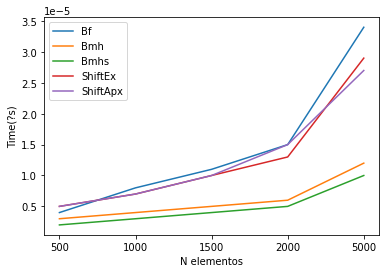

In [ ]:


#Bf,Bmh,Bmhs,ShiftEx,ShiftApx
#plt.scatter(df.Bf, df.Bmh, df.Bmhs, df.ShiftEx, df.ShiftApx)
#plt.show()
df = pd.read_csv('/content/TimeTests.csv')
%matplotlib inline


plt.xlabel("N elementos")
plt.ylabel("Time(?s)")
#plt.plot([500,1000,1500,2000,5000], df.Bf, df.Bmh, df.Bmhs, df.ShiftEx, df.ShiftApx)

x = [500,1000,1500,2000,5000]
plt.xticks(range(len(x)), x);

plt.plot(df.Bf, label='Bf')
plt.plot(df.Bmh, label='Bmh')
plt.plot(df.Bmhs, label='Bmhs')
plt.plot(df.ShiftEx, label='ShiftEx')
plt.plot(df.ShiftApx, label='ShiftApx')
plt.legend()
plt.show()